# Analyse des données et réponse aux questions

## Sommaire <a id='sommaire'></a>
<ol>
    <li><a href='#question_1'>Question 1 : Quelle était la proportion de personnes en état de sous-nutrition pour l'année 2017 ?</a></li>
        <ol><li><a href='#reponse_question_1'>Réponse Question 1</a></li></ol>
    <li><a href='#question_2'>Question 2 : En 2017, quel était le nombre de personnes qui aurait pu être nourries ?</a></li>
        <ol><li><a href='#reponse_question_2'>Réponse Question 2</a></li></ol>
    <li><a href='#question_3'>Question 3 : Idem avec des produits végétaux, en 2017, quel était le nombre de personnes qui aurait pu être nourries avec des produits végétaux ?</a></li>
        <ol><li><a href='#reponse_question_3'>Réponse Question 3</a></li></ol>
    <li><a href='#question_4'>Pour l'année 2017, quelle est l’utilisation de la disponibilité intérieure ? En particulier quelle est la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine ?</a></li>
        <ol><li><a href='#reponse_question_4'>Réponse Question 4</a></li></ol>
    <li><a href='#question_5'>Quelle est l'utilisation des céréales ? Et plus particulièrement, quelle est la répartition entre l'alimentation humaine et l'alimentation pour animaux ?</a></li>
        <ol><li><a href='#reponse_question_5'>Réponse Question 5</a></li></ol>
    <li><a href='#question_6'>Comment est utilisé le manioc en Thaïlande ? Et plus particulièrement quelle est la part de l’exportation comparé à la production ? Quelles conclusions peut-on en tirer aux égards de la proportion de personnes en sous nutrition ?</a></li>
        <ol><li><a href='#reponse_question_6'>Réponse Question 6</a></li></ol>
    <li><a href='#question_7'>Pour quels pays la proportion des sous alimentés est la plus forte en 2017 ?</a></li>
        <ol><li><a href='#reponse_question_7'>Réponse Question 7</a></li></ol>
    <li><a href='#question_8'>Quels sont les pays qui ont bénéficiés de plus d’aides depuis 2013 ?</a></li>
        <ol><li><a href='#reponse_question_8'>Réponse Question 8</a></li>
            <li><a href='#conclusion_question_8'>Conclusion Question 8</a></li></ol>
    <li><a href='#question_9'>Quels sont les pays qui ont le plus de disponibilités alimentaires ?</a></li>
        <ol><li><a href='#reponse_question_9'>Réponse Question 9</a></li></ol>
    <li><a href='#question_10'>Quels sont les pays qui ont le moins de disponibilités alimentaires ?</a></li>
        <ol><li><a href='#reponse_question_10'>Réponse Question 10</a></li></ol>
    <li><a href='#approfondissement'>Approfondissement</a></li>
</ol>

<a id='import_fichiers_nettoyes'></a>
## Import des fichiers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
folder = "D:/Data_Analyst_Projet/Projet 4/Données/Données analyse python/"

In [2]:
df_sous_nutrition=pd.read_csv(folder+'sous_nutrition_2.csv')
df_sous_nutrition.head()

,Pays,Année,Population_en_sous_nutrition
0,Afghanistan,2013,8600000
1,Afghanistan,2014,8800000
2,Afghanistan,2015,8900000
3,Afghanistan,2016,9700000
4,Afghanistan,2017,10500000


In [3]:
df_population=pd.read_csv(folder+'population_2.csv')
df_population.head()

,Pays,Année,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113


In [4]:
df_aide_alimentaire=pd.read_csv(folder+'aide_alimentaire_2.csv')
df_aide_alimentaire.head()

,Pays,Année,Produit_aide,Tonnage aide alimentaire
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [5]:
df_dispo_alimentaire=pd.read_csv(folder+'dispo_alimentaire_2.csv')
df_dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Pays                                                           15605 non-null  object 
 1   Produit_disponibilite                                          15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          15605 non-null  float64
 4   Autres Utilisations                                            15605 non-null  float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 15605 non-null  float64
 6   Disponibilité alimentaire en quantité (g/personne/jour)        15605 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

### Variables globales

In [6]:
# Mise en place de cette palette de couleurs pour toute la suite du document
sns.set_theme()
sns.set_palette('flare')

<a id='question_1'></a>
## Questions 1 : <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>
## Quelle était la proportion de personnes en état de sous-nutrition pour l'année 2017 ?

In [7]:
df_population.head()

,Pays,Année,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113


### Calcul de la population mondiale en 2017

In [8]:
population_2017=df_population.loc[df_population['Année']==2017,'Population'].sum()
phrase_population_2017=f'En 2017, la population mondiale était de {population_2017} habitants.'
phrase_population_2017

'En 2017, la population mondiale était de 7548134097 habitants.'

In [9]:
df_sous_nutrition.head()

,Pays,Année,Population_en_sous_nutrition
0,Afghanistan,2013,8600000
1,Afghanistan,2014,8800000
2,Afghanistan,2015,8900000
3,Afghanistan,2016,9700000
4,Afghanistan,2017,10500000


### Population mondiale en sous nutrition en 2017

In [10]:
population_sous_nutrition_2017=df_sous_nutrition.loc[df_sous_nutrition['Année']==2017,
                                                     'Population_en_sous_nutrition'].sum()
phrase_population_sous_nutrition_2017=f'En 2017, {population_sous_nutrition_2017} personnes étaient en état de sous nutrition dans le monde.'
print(phrase_population_sous_nutrition_2017)

En 2017, 535700000 personnes étaient en état de sous nutrition dans le monde.


### Proportion de personnes en état de sous nutrition

In [11]:
proportion_sous_nutrition_2017='{:.1%}'.format(population_sous_nutrition_2017/population_2017)
phrase_proportion_sous_nutrition_2017=f'En 2017, {proportion_sous_nutrition_2017} de la population mondiale était en état de sous nutrition.'
print(phrase_proportion_sous_nutrition_2017)

En 2017, 7.1% de la population mondiale était en état de sous nutrition.


Cependant, on sait d'après le site de la FAO, que les valeurs nulles du fichier sous_nutrition sont en réalité des valeurs manquantes. On ne peut donc pas certifier que le nombre de personnes en état de sous nutrition dans ces pays est nul.
On va donc faire un autre calcul en prenant en compte uniquement les pays où nous avons des données sur la sous nutrition et faire un interval entre la première valeur trouvée et la nouvelle.
Pour cela, nous allons faire une jointure entre les 2 fichiers, en prenant en compte uniquement les pays (et leur population) où nous avons des données sur la sous nutrition ('Population_en_sous_nutrition'!=0).

### Jointure fichier sous_nutrition_population

In [12]:
df_sous_nutrition_population=pd.merge(df_sous_nutrition, df_population, on=['Pays','Année'], how='left')
df_sous_nutrition_population

,Pays,Année,Population_en_sous_nutrition,Population
0,Afghanistan,2013,8600000,32269589
1,Afghanistan,2014,8800000,33370794
2,Afghanistan,2015,8900000,34413603
3,Afghanistan,2016,9700000,35383032
4,Afghanistan,2017,10500000,36296113
...,...,...,...,...
1213,Zimbabwe,2014,0,13586707
1214,Zimbabwe,2015,0,13814629
1215,Zimbabwe,2016,0,14030331
1216,Zimbabwe,2017,0,14236595


In [13]:
# on créé un masque avec les contraintes Année 2017 et 'Population_en_sous_nutrition' !=0
# on l'applique pour calculer le nombre de personne en état de sous nutrition dans le monde (toujours le même)
mask_donnee_presentes = (df_sous_nutrition_population['Année']==2017) & (df_sous_nutrition_population['Population_en_sous_nutrition']!=0)
population_sous_nutrition_2_2017=df_sous_nutrition_population.loc[mask_donnee_presentes,'Population_en_sous_nutrition'].sum()
population_sous_nutrition_2_2017

535700000

In [14]:
# Population totale des pays ou des valeurs ont été communiqués concernant le nombre de personnes en état de sous nutrition dans le pays
population_2017_donnees_presentes=df_sous_nutrition_population.loc[mask_donnee_presentes,'Population'].sum()
population_2017_donnees_presentes

4167953739

In [15]:
proportion_sous_nutrition_2017_donnees_presentes='{:.0%}'.format(population_sous_nutrition_2_2017/population_2017_donnees_presentes)
proportion_sous_nutrition_2017_donnees_presentes

'13%'

In [16]:
phrase_proportion_sous_nutrition_2017_donnees_presentes=f'En 2017, si on prends en compte uniquement la population des pays ayant communiqué des données sur la sous nutrition, on a {proportion_sous_nutrition_2017_donnees_presentes} de la population mondiale qui était en état de sous nutrition.'
phrase_proportion_sous_nutrition_2017_donnees_presentes

'En 2017, si on prends en compte uniquement la population des pays ayant communiqué des données sur la sous nutrition, on a 13% de la population mondiale qui était en état de sous nutrition.'

<a id='reponse_question_1' ></a>
## Réponse Question 1<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

In [17]:
Reponse_question = f"D'après les résultats précédents, on a donc entre {proportion_sous_nutrition_2017} et {proportion_sous_nutrition_2017_donnees_presentes} de la population mondiale qui était en état de sous nutrition en 2017.\nD'après https://fr.statista.com/statistiques/565273/prevalence-de-la-sous-alimentation-dans-le-monde-1990/, les chiffres officiels communiqués indiquaient que 11% de la population mondiale était en état de sous nutrition en 2017."
print(Reponse_question)

D'après les résultats précédents, on a donc entre 7.1% et 13% de la population mondiale qui était en état de sous nutrition en 2017.
D'après https://fr.statista.com/statistiques/565273/prevalence-de-la-sous-alimentation-dans-le-monde-1990/, les chiffres officiels communiqués indiquaient que 11% de la population mondiale était en état de sous nutrition en 2017.


## Visualisation

In [18]:
d={'Chiffres':[population_sous_nutrition_2017, population_2017_donnees_presentes, population_2017],
  'Catégories':['Population en sous nutrition', 'Population Mondiale fichier sous nutrition', 'Population Totale Mondiale']}
df_visualisation_sous_nutrition=pd.DataFrame(data=d)
df_visualisation_sous_nutrition

,Chiffres,Catégories
0,535700000,Population en sous nutrition
1,4167953739,Population Mondiale fichier sous nutrition
2,7548134097,Population Totale Mondiale


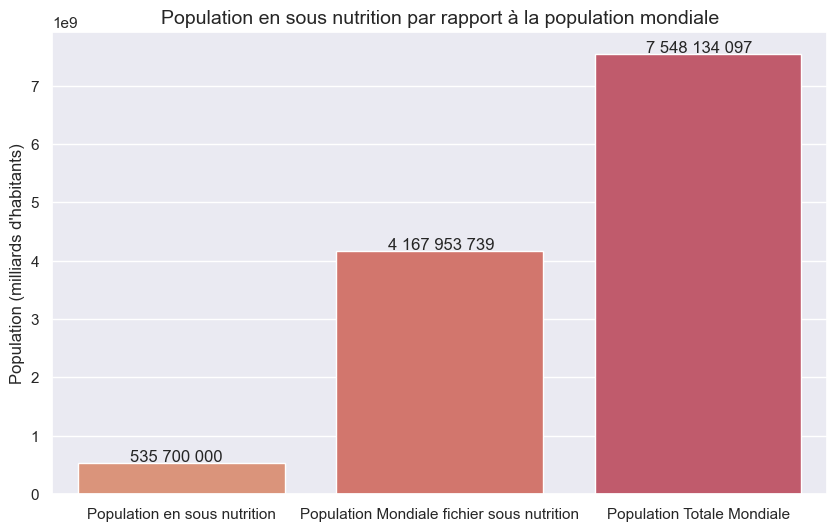

In [19]:
plt.figure(figsize=(10,6))

sns.barplot(data=df_visualisation_sous_nutrition, x='Catégories', y='Chiffres', ci=None)
plt.ylabel("Population (milliards d'habitants)")
plt.xlabel(None)

plt.title('Population en sous nutrition par rapport à la population mondiale', fontsize=14)

for i in range (df_visualisation_sous_nutrition.shape[0]):
    # plt.text(position x, position y, valeur)
    plt.text(i-0.2, df_visualisation_sous_nutrition.iloc[i,0]+18000000, '{:,}'.format(df_visualisation_sous_nutrition.iloc[i,0]).replace(',',' '))

    
plt.show()

In [20]:
d2={'Chiffres':[population_sous_nutrition_2017, (population_2017-population_sous_nutrition_2017)],
  'Catégories':['Population en sous nutrition', 'Autre part de la population']}
df_visualisation_sous_nutrition_2=pd.DataFrame(data=d2)
df_visualisation_sous_nutrition_2


d3={'Chiffres':[population_sous_nutrition_2017, (population_2017_donnees_presentes-population_sous_nutrition_2017)],
  'Catégories':['Population en sous nutrition', 'Autre part de la population']}
df_visualisation_sous_nutrition_3=pd.DataFrame(data=d3)
df_visualisation_sous_nutrition_3

,Chiffres,Catégories
0,535700000,Population en sous nutrition
1,3632253739,Autre part de la population


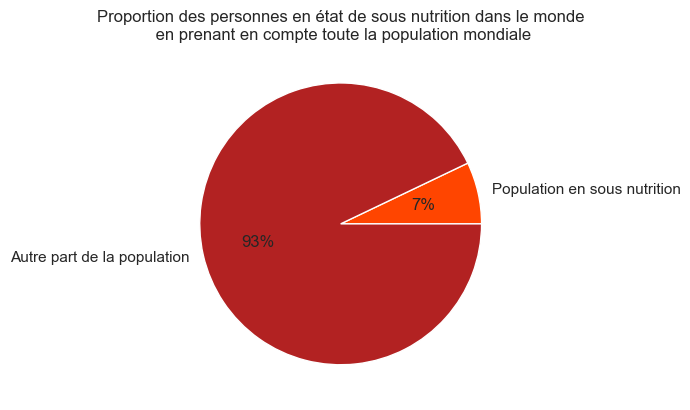

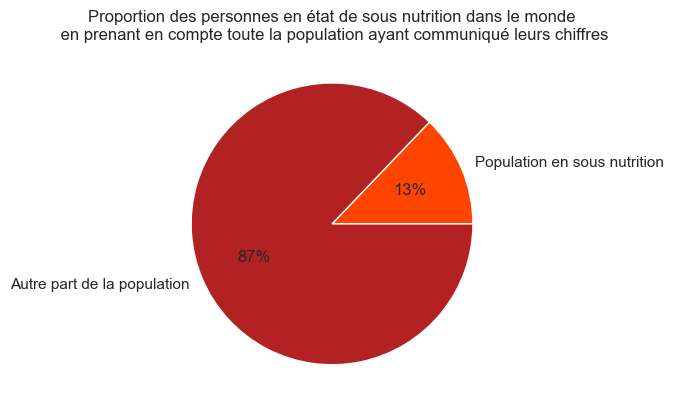

In [21]:
plt.figure(figsize=(10,6))

colors=['orangered', 'firebrick']

plt.subplot(1,2,1)
plt.pie(x=df_visualisation_sous_nutrition_2['Chiffres'], labels=df_visualisation_sous_nutrition_2['Catégories'], 
        autopct='%.0f%%', colors=colors)
plt.title('Proportion des personnes en état de sous nutrition dans le monde\n en prenant en compte toute la population mondiale')


plt.figure(figsize=(10,6))

plt.subplot(1,2,2)
plt.pie(x=df_visualisation_sous_nutrition_3['Chiffres'], labels=df_visualisation_sous_nutrition_3['Catégories'], 
        autopct='%.0f%%', colors=colors)
plt.title('Proportion des personnes en état de sous nutrition dans le monde\n en prenant en compte toute la population ayant communiqué leurs chiffres')


plt.show()

In [22]:
# affiche les paramètres par défaut de matplotlib
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',
          'axes.grid.which': 

<a id='question_2'></a>
## Question 2 : <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>
## En 2017, quel était le nombre de personnes qui aurait pu être nourries ?
### Nous allons calculer cela à partir de la disponibilité alimentaire mondial.
On prendra un besoin énergétique nécessaire de 2300 kcal/personne/jour et on calculera pour chaque pays la population théorique qu'on aurait pu nourrir en fonction de sa dispo alimentaire et de sa population et on fera la somme de tous les pays.

In [23]:
df_dispo_alimentaire

,Pays,Produit_disponibilite,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,4.71,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,3.53,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.16,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,7.40,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,12.88,4.28,1.41,3000.0,0.0,0.0,3000.0,0.0,2000.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,9.15,0.69,1.14,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.16,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.19,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


D’après https://www.la-vie-naturelle.com/blog/post/combien-de-calories-par-jour, pour les hommes, le besoin énergétique moyen se situe entre 2400 et 2700 kcal. Pour les femmes, la recommandation est de 2000 à 2200 kcal.
Pour connaître le nombre de personnes théorique que l'on pourrait nourrir à partir de la disponibilité alimentaire mondiale, je vais calculer combien de personnes serait nourries dans chaque pays si les habitants consommait 2300 Kcal/personne/jour, je vais aussi faire ce calcul pour 2100 et 2600 Kcal/personne/jour pour avoir un interval et mesurer la sensibilité de la variable.

Pour faire cela, je vais :
- Agréger les données pour avoir la disponibilité alimentaire totale pour chaque pays
- Lier le fichier population pour avoir la population de chaque pays du fichier disponibilité alimentaire
- Calculer combien de personnes serait nourries si chaque habitant consommait 2100, 2300, 2600 Kcal/jour pour chaque pays
- Faire la somme des population théoriques nourries pour chaque pays pour avoir la population mondiale

### Agrégation des données par pays
#### Une disponibilité alimentaire par pays

In [24]:
df_dispo_alimentaire_totale_pays=df_dispo_alimentaire.groupby('Pays').sum()
df_dispo_alimentaire_totale_pays.reset_index(inplace=True)
df_dispo_alimentaire_totale_pays

,Pays,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,768000.0,415000.0,2087.0,962.72,33.50,58.26,13515000.0,278000.0,2988000.0,10735000.0,1135000.0,11171000.0,395000.0,63000.0,-368000.0
1,Afrique du Sud,5309000.0,876000.0,3020.0,1547.40,83.58,85.33,61256000.0,11674000.0,7517000.0,29812000.0,2193000.0,63263000.0,253000.0,22819000.0,2153000.0
2,Albanie,660000.0,174000.0,3188.0,3001.50,106.48,111.37,4758000.0,94000.0,933000.0,3476000.0,276000.0,3964000.0,55000.0,113000.0,-45000.0
3,Algérie,4352000.0,1707000.0,3293.0,2216.77,76.48,91.92,42630000.0,655000.0,17403000.0,31729000.0,3753000.0,26359000.0,449000.0,637000.0,-479000.0
4,Allemagne,30209000.0,7711000.0,3503.0,2623.32,141.62,101.39,162275000.0,57431000.0,65353000.0,79238000.0,3781000.0,154547000.0,1551000.0,39842000.0,-192000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1174000.0,2689000.0,3275.0,1918.48,87.16,104.51,11850000.0,4343000.0,15327000.0,6548000.0,705000.0,1192000.0,3000.0,804000.0,-327000.0
170,Équateur,1200000.0,1909000.0,2346.0,1492.90,94.64,61.30,18614000.0,8002000.0,1725000.0,8574000.0,707000.0,24337000.0,138000.0,6200000.0,557000.0
171,États-Unis d'Amérique,148432000.0,154699000.0,3682.0,2746.29,161.37,109.42,777992000.0,163524000.0,81887000.0,320889000.0,7162000.0,894668000.0,10403000.0,141010000.0,-35032000.0
172,Éthiopie,685000.0,3641000.0,2129.0,971.38,25.89,60.39,44014000.0,941000.0,1711000.0,33361000.0,2256000.0,46102000.0,640000.0,3443000.0,-2857000.0


Text(0.5, 1.0, 'Distribution de la disponiblité alimentaire des pays')

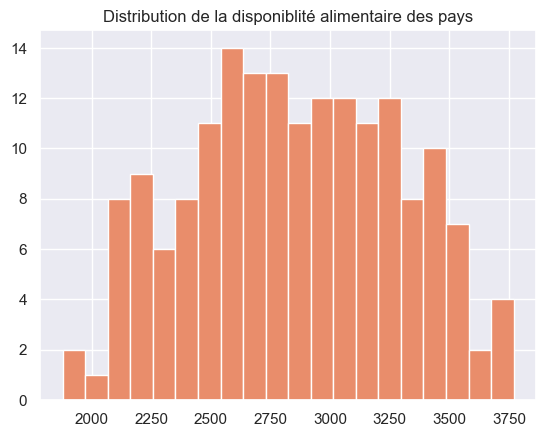

In [25]:
# distribution de la disponiblité alimentaire des pays
plt.hist(df_dispo_alimentaire_totale_pays['Disponibilité alimentaire (Kcal/personne/jour)'], bins=20)
plt.title('Distribution de la disponiblité alimentaire des pays')

In [26]:
df_population

,Pays,Année,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113
...,...,...,...
1411,Zimbabwe,2014,13586707
1412,Zimbabwe,2015,13814629
1413,Zimbabwe,2016,14030331
1414,Zimbabwe,2017,14236595


### Création dataframe df_population_2017

In [27]:
df_population_2017=df_population.loc[df_population['Année']==2017,:]
df_population_2017.reset_index(drop=True, inplace=True)
df_population_2017

,Pays,Année,Population
0,Afghanistan,2017,36296113
1,Afrique du Sud,2017,57009756
2,Albanie,2017,2884169
3,Algérie,2017,41389189
4,Allemagne,2017,82658409
...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402484
232,Viet Nam,2017,94600648
233,Yémen,2017,27834819
234,Zambie,2017,16853599


### Jointure de dispo alimentaire avec population

In [28]:
df_dispo_alimentaire_population=pd.merge(df_dispo_alimentaire_totale_pays, df_population_2017, on='Pays' ,how='left')
df_dispo_alimentaire_population.head()

,Pays,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,768000.0,415000.0,2087.0,962.72,33.50,58.26,13515000.0,278000.0,2988000.0,10735000.0,1135000.0,11171000.0,395000.0,63000.0,-368000.0,2017,36296113
1,Afrique du Sud,5309000.0,876000.0,3020.0,1547.40,83.58,85.33,61256000.0,11674000.0,7517000.0,29812000.0,2193000.0,63263000.0,253000.0,22819000.0,2153000.0,2017,57009756
2,Albanie,660000.0,174000.0,3188.0,3001.50,106.48,111.37,4758000.0,94000.0,933000.0,3476000.0,276000.0,3964000.0,55000.0,113000.0,-45000.0,2017,2884169
3,Algérie,4352000.0,1707000.0,3293.0,2216.77,76.48,91.92,42630000.0,655000.0,17403000.0,31729000.0,3753000.0,26359000.0,449000.0,637000.0,-479000.0,2017,41389189
4,Allemagne,30209000.0,7711000.0,3503.0,2623.32,141.62,101.39,162275000.0,57431000.0,65353000.0,79238000.0,3781000.0,154547000.0,1551000.0,39842000.0,-192000.0,2017,82658409


In [29]:
df_dispo_alimentaire_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Pays                                                           174 non-null    object 
 1   Aliments pour animaux                                          174 non-null    float64
 2   Autres Utilisations                                            174 non-null    float64
 3   Disponibilité alimentaire (Kcal/personne/jour)                 174 non-null    float64
 4   Disponibilité alimentaire en quantité (g/personne/jour)        174 non-null    float64
 5   Disponibilité de matière grasse en quantité (g/personne/jour)  174 non-null    float64
 6   Disponibilité de protéines en quantité (g/personne/jour)       174 non-null    float64
 7   Disponibilité intérieure                                      

### Calcul de la population théorique nourri avec 2300 kcal/personne/jour pour chaque pays

In [30]:
# population théorique = dispo_alimentaire_pays*population_pays/besoin_energetique_necessaire
df_dispo_alimentaire_population['Population nourrie avec 2300 kcal/personne/jour']=df_dispo_alimentaire_population['Disponibilité alimentaire (Kcal/personne/jour)']*df_dispo_alimentaire_population['Population']/2300

In [31]:
df_dispo_alimentaire_population.head()

,Pays,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,Population nourrie avec 2300 kcal/personne/jour
0,Afghanistan,768000.0,415000.0,2087.0,962.72,33.50,58.26,13515000.0,278000.0,2988000.0,10735000.0,1135000.0,11171000.0,395000.0,63000.0,-368000.0,2017,36296113,3.293478e+07
1,Afrique du Sud,5309000.0,876000.0,3020.0,1547.40,83.58,85.33,61256000.0,11674000.0,7517000.0,29812000.0,2193000.0,63263000.0,253000.0,22819000.0,2153000.0,2017,57009756,7.485629e+07
2,Albanie,660000.0,174000.0,3188.0,3001.50,106.48,111.37,4758000.0,94000.0,933000.0,3476000.0,276000.0,3964000.0,55000.0,113000.0,-45000.0,2017,2884169,3.997709e+06
3,Algérie,4352000.0,1707000.0,3293.0,2216.77,76.48,91.92,42630000.0,655000.0,17403000.0,31729000.0,3753000.0,26359000.0,449000.0,637000.0,-479000.0,2017,41389189,5.925852e+07
4,Allemagne,30209000.0,7711000.0,3503.0,2623.32,141.62,101.39,162275000.0,57431000.0,65353000.0,79238000.0,3781000.0,154547000.0,1551000.0,39842000.0,-192000.0,2017,82658409,1.258924e+08


In [32]:
df_dispo_alimentaire_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 19 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Pays                                                           174 non-null    object 
 1   Aliments pour animaux                                          174 non-null    float64
 2   Autres Utilisations                                            174 non-null    float64
 3   Disponibilité alimentaire (Kcal/personne/jour)                 174 non-null    float64
 4   Disponibilité alimentaire en quantité (g/personne/jour)        174 non-null    float64
 5   Disponibilité de matière grasse en quantité (g/personne/jour)  174 non-null    float64
 6   Disponibilité de protéines en quantité (g/personne/jour)       174 non-null    float64
 7   Disponibilité intérieure                                      

In [33]:
# On convertie en entier ['Population nourrie avec 2300 kcal/personne/jour']
df_dispo_alimentaire_population['Population nourrie avec 2300 kcal/personne/jour']=df_dispo_alimentaire_population['Population nourrie avec 2300 kcal/personne/jour'].astype('int64')
df_dispo_alimentaire_population.head()

,Pays,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,Population nourrie avec 2300 kcal/personne/jour
0,Afghanistan,768000.0,415000.0,2087.0,962.72,33.50,58.26,13515000.0,278000.0,2988000.0,10735000.0,1135000.0,11171000.0,395000.0,63000.0,-368000.0,2017,36296113,32934777
1,Afrique du Sud,5309000.0,876000.0,3020.0,1547.40,83.58,85.33,61256000.0,11674000.0,7517000.0,29812000.0,2193000.0,63263000.0,253000.0,22819000.0,2153000.0,2017,57009756,74856288
2,Albanie,660000.0,174000.0,3188.0,3001.50,106.48,111.37,4758000.0,94000.0,933000.0,3476000.0,276000.0,3964000.0,55000.0,113000.0,-45000.0,2017,2884169,3997709
3,Algérie,4352000.0,1707000.0,3293.0,2216.77,76.48,91.92,42630000.0,655000.0,17403000.0,31729000.0,3753000.0,26359000.0,449000.0,637000.0,-479000.0,2017,41389189,59258521
4,Allemagne,30209000.0,7711000.0,3503.0,2623.32,141.62,101.39,162275000.0,57431000.0,65353000.0,79238000.0,3781000.0,154547000.0,1551000.0,39842000.0,-192000.0,2017,82658409,125892350


### Calcul de la population théorique nourri avec 2100 et 2600 kcal/personne/jour pour chaque pays

In [34]:
# Création et calcul des colonnes
df_dispo_alimentaire_population['Population nourrie avec 2100 kcal/personne/jour']=df_dispo_alimentaire_population['Disponibilité alimentaire (Kcal/personne/jour)']*df_dispo_alimentaire_population['Population']/2100
df_dispo_alimentaire_population['Population nourrie avec 2600 kcal/personne/jour']=df_dispo_alimentaire_population['Disponibilité alimentaire (Kcal/personne/jour)']*df_dispo_alimentaire_population['Population']/2600

In [35]:
# On convertie en entier 
df_dispo_alimentaire_population['Population nourrie avec 2100 kcal/personne/jour']=df_dispo_alimentaire_population['Population nourrie avec 2100 kcal/personne/jour'].astype('int64')
df_dispo_alimentaire_population['Population nourrie avec 2600 kcal/personne/jour']=df_dispo_alimentaire_population['Population nourrie avec 2600 kcal/personne/jour'].astype('int64')
df_dispo_alimentaire_population

,Pays,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,...,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,Population nourrie avec 2300 kcal/personne/jour,Population nourrie avec 2100 kcal/personne/jour,Population nourrie avec 2600 kcal/personne/jour
0,Afghanistan,768000.0,415000.0,2087.0,962.72,33.50,58.26,13515000.0,278000.0,2988000.0,...,1135000.0,11171000.0,395000.0,63000.0,-368000.0,2017,36296113,32934777,36071422,29134610
1,Afrique du Sud,5309000.0,876000.0,3020.0,1547.40,83.58,85.33,61256000.0,11674000.0,7517000.0,...,2193000.0,63263000.0,253000.0,22819000.0,2153000.0,2017,57009756,74856288,81985458,66219024
2,Albanie,660000.0,174000.0,3188.0,3001.50,106.48,111.37,4758000.0,94000.0,933000.0,...,276000.0,3964000.0,55000.0,113000.0,-45000.0,2017,2884169,3997709,4378443,3536434
3,Algérie,4352000.0,1707000.0,3293.0,2216.77,76.48,91.92,42630000.0,655000.0,17403000.0,...,3753000.0,26359000.0,449000.0,637000.0,-479000.0,2017,41389189,59258521,64902190,52420999
4,Allemagne,30209000.0,7711000.0,3503.0,2623.32,141.62,101.39,162275000.0,57431000.0,65353000.0,...,3781000.0,154547000.0,1551000.0,39842000.0,-192000.0,2017,82658409,125892350,137882098,111366310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1174000.0,2689000.0,3275.0,1918.48,87.16,104.51,11850000.0,4343000.0,15327000.0,...,705000.0,1192000.0,3000.0,804000.0,-327000.0,2017,9487203,13508952,14795518,11950226
170,Équateur,1200000.0,1909000.0,2346.0,1492.90,94.64,61.30,18614000.0,8002000.0,1725000.0,...,707000.0,24337000.0,138000.0,6200000.0,557000.0,2017,16785361,17121068,18751646,15145560
171,États-Unis d'Amérique,148432000.0,154699000.0,3682.0,2746.29,161.37,109.42,777992000.0,163524000.0,81887000.0,...,7162000.0,894668000.0,10403000.0,141010000.0,-35032000.0,2017,325084756,520418291,569981938,460370027
172,Éthiopie,685000.0,3641000.0,2129.0,971.38,25.89,60.39,44014000.0,941000.0,1711000.0,...,2256000.0,46102000.0,640000.0,3443000.0,-2857000.0,2017,106399924,98489320,107869256,87125168


### Pour plus de clarté on affiche uniquement les colonnes qui nous intéresse

In [36]:
# population théorique = dispo_alimentaire_pays*population_pays/besoin_energetique_necessaire
df_population_theorique_nourrie=df_dispo_alimentaire_population.iloc[:,[0,3,-4,-2,-3,-1]]
df_population_theorique_nourrie
# on peut aussi utiliser loc et les noms de colonnes, je l'utilise plus loin

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Population,Population nourrie avec 2100 kcal/personne/jour,Population nourrie avec 2300 kcal/personne/jour,Population nourrie avec 2600 kcal/personne/jour
0,Afghanistan,2087.0,36296113,36071422,32934777,29134610
1,Afrique du Sud,3020.0,57009756,81985458,74856288,66219024
2,Albanie,3188.0,2884169,4378443,3997709,3536434
3,Algérie,3293.0,41389189,64902190,59258521,52420999
4,Allemagne,3503.0,82658409,137882098,125892350,111366310
...,...,...,...,...,...,...
169,Émirats arabes unis,3275.0,9487203,14795518,13508952,11950226
170,Équateur,2346.0,16785361,18751646,17121068,15145560
171,États-Unis d'Amérique,3682.0,325084756,569981938,520418291,460370027
172,Éthiopie,2129.0,106399924,107869256,98489320,87125168


### Voici le nombre total de personne qui aurait pu être nourri en 2017 en fonction de différents besoins énergétiques 

In [37]:
df_totaux_sommes=df_population_theorique_nourrie.iloc[:,-3:].sum()
df_totaux_sommes

Population nourrie avec 2100 kcal/personne/jour    10086744073
Population nourrie avec 2300 kcal/personne/jour     9209635884
Population nourrie avec 2600 kcal/personne/jour     8146985577
dtype: int64

<a id="reponse_question_2" ></a>
## Réponse Question 2<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

In [38]:
borne_interval_bas='{:,}'.format(df_totaux_sommes[2]).replace(',',' ')
borne_interval_haut='{:,}'.format(df_totaux_sommes[0]).replace(',',' ')
print(f"En 2017, si chaque être humain avait consommé entre 2100 et 2600 kcal/personne/jour, entre {borne_interval_bas} et {borne_interval_haut} de personnes aurait pu être nourris.")

En 2017, si chaque être humain avait consommé entre 2100 et 2600 kcal/personne/jour, entre 8 146 985 577 et 10 086 744 073 de personnes aurait pu être nourris.


### Hypothèse

Cependant la somme des populations des pays représentés dans le fichier dispo_alimentaire atteint 7 369 269 318 de personnes en 2017. Or, la population mondiale réelle était de 7 548 134 097, ce qui veut dire que près de 180 millions de personnes ne sont pas représentées dans dispo_alimentaire.
On va donné de nouveau chiffres en prenant en compte ces 180 millions de personnes en multipliant la population théorique qu'on pourrait nourrir par le même coefficient qui sépare la population mondiale réelle et celle représentée par les pays du fichier dispo_alimentaire (7548134097/7369269318). Cela revient à affecter la disponibilité alimentaire mondiale moyenne à ces 180 millions de personnes.

In [39]:
df_dispo_alimentaire_population['Population'].sum()
'{:,}'.format(df_dispo_alimentaire_population['Population'].sum()).replace(',',' ')

'7 369 269 318'

In [40]:
'{:,}'.format(df_population.loc[df_population['Année']==2017,'Population'].sum()).replace(',',' ')

'7 548 134 097'

In [41]:
coefficient_multiplicateur=df_population.loc[df_population['Année']==2017,'Population'].sum()/df_dispo_alimentaire_population['Population'].sum()
coefficient_multiplicateur

1.024271711520043

Avec ce coefficient, voici le nouvel interval des personnes qui aurait pu être nourries en 2017 :

In [42]:
print(f"En 2017, si chaque être humain avait consommé entre 2100 et 2600 kcal/personne/jour, entre {'{:,}'.format(int(df_totaux_sommes[2]*coefficient_multiplicateur)).replace(',',' ')} et {'{:,}'.format(int(df_totaux_sommes[0]*coefficient_multiplicateur)).replace(',',' ')} de personnes aurait pu être nourris.")

En 2017, si chaque être humain avait consommé entre 2100 et 2600 kcal/personne/jour, entre 8 344 726 860 et 10 331 566 615 de personnes aurait pu être nourris.


<a id='question_3' ></a>
## Question 3 : <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

## Idem avec des produits végétaux, en 2017, quel était le nombre de personnes qui aurait pu être nourries avec des produits végétaux ?

On va effectuer exactement les mêmes commandes, en prenant en compte uniquement les produits d'origine végétales dans le calcul des disponibilités alimentaires.

In [43]:
df_dispo_alimentaire_vegetale=df_dispo_alimentaire[df_dispo_alimentaire['Origine']=='vegetale']
df_dispo_alimentaire_vegetale.reset_index(drop=True,inplace=True)
df_dispo_alimentaire_vegetale

,Pays,Produit_disponibilite,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,3.53,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
1,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.16,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,7.40,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.25,0.00,0.00,3000.0,0.0,3000.0,3000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11891,Îles Salomon,Sésame,vegetale,0.0,0.0,0.0,0.03,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11892,Îles Salomon,Thé,vegetale,0.0,0.0,0.0,0.47,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11893,Îles Salomon,Tomates,vegetale,0.0,0.0,0.0,0.19,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11894,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.19,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Agrégation disponibilité alimentaire d'origine végétale par pays

In [44]:
df_dispo_alimentaire_vegetale_totale_pays=df_dispo_alimentaire_vegetale.groupby('Pays').sum()
df_dispo_alimentaire_vegetale_totale_pays.reset_index(inplace=True)
df_dispo_alimentaire_vegetale_totale_pays

,Pays,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,645000.0,415000.0,1871.0,743.77,18.27,46.05,10884000.0,278000.0,2638000.0,8293000.0,1072000.0,8891000.0,393000.0,63000.0,-368000.0
1,Afrique du Sud,5122000.0,761000.0,2533.0,1164.85,48.92,48.94,53439000.0,10586000.0,6468000.0,22441000.0,2110000.0,55649000.0,186000.0,22819000.0,1912000.0
2,Albanie,559000.0,172000.0,2203.0,1935.61,38.76,51.96,3326000.0,84000.0,846000.0,2241000.0,182000.0,2609000.0,55000.0,113000.0,-45000.0
3,Algérie,4352000.0,1706000.0,2915.0,1732.44,54.12,66.94,35510000.0,649000.0,14672000.0,24797000.0,3587000.0,21964000.0,428000.0,637000.0,-479000.0
4,Allemagne,28122000.0,6842000.0,2461.0,1558.39,63.63,39.90,126866000.0,34454000.0,50642000.0,47079000.0,3717000.0,110926000.0,1475000.0,39686000.0,-247000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1174000.0,2619000.0,2718.0,1296.39,53.00,62.81,9623000.0,3326000.0,12546000.0,4426000.0,675000.0,780000.0,0.0,804000.0,-376000.0
170,Équateur,1001000.0,1905000.0,1732.0,896.46,49.48,24.80,14926000.0,7142000.0,1475000.0,5149000.0,654000.0,20042000.0,125000.0,6200000.0,555000.0
171,États-Unis d'Amérique,145289000.0,145102000.0,2698.0,1618.29,93.68,39.65,632023000.0,140442000.0,69522000.0,189122000.0,6937000.0,740194000.0,9030000.0,140986000.0,-37242000.0
172,Éthiopie,667000.0,3641000.0,2005.0,824.64,17.88,52.70,38824000.0,918000.0,1694000.0,28320000.0,2125000.0,40907000.0,635000.0,3443000.0,-2857000.0


### Jointure avec population 2017

In [45]:
df_dispo_alimentaire_vegetale_totale_population=pd.merge(df_dispo_alimentaire_vegetale_totale_pays, 
                                                         df_population_2017, on='Pays' ,how='left')
df_dispo_alimentaire_vegetale_totale_population

,Pays,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,645000.0,415000.0,1871.0,743.77,18.27,46.05,10884000.0,278000.0,2638000.0,8293000.0,1072000.0,8891000.0,393000.0,63000.0,-368000.0,2017,36296113
1,Afrique du Sud,5122000.0,761000.0,2533.0,1164.85,48.92,48.94,53439000.0,10586000.0,6468000.0,22441000.0,2110000.0,55649000.0,186000.0,22819000.0,1912000.0,2017,57009756
2,Albanie,559000.0,172000.0,2203.0,1935.61,38.76,51.96,3326000.0,84000.0,846000.0,2241000.0,182000.0,2609000.0,55000.0,113000.0,-45000.0,2017,2884169
3,Algérie,4352000.0,1706000.0,2915.0,1732.44,54.12,66.94,35510000.0,649000.0,14672000.0,24797000.0,3587000.0,21964000.0,428000.0,637000.0,-479000.0,2017,41389189
4,Allemagne,28122000.0,6842000.0,2461.0,1558.39,63.63,39.90,126866000.0,34454000.0,50642000.0,47079000.0,3717000.0,110926000.0,1475000.0,39686000.0,-247000.0,2017,82658409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1174000.0,2619000.0,2718.0,1296.39,53.00,62.81,9623000.0,3326000.0,12546000.0,4426000.0,675000.0,780000.0,0.0,804000.0,-376000.0,2017,9487203
170,Équateur,1001000.0,1905000.0,1732.0,896.46,49.48,24.80,14926000.0,7142000.0,1475000.0,5149000.0,654000.0,20042000.0,125000.0,6200000.0,555000.0,2017,16785361
171,États-Unis d'Amérique,145289000.0,145102000.0,2698.0,1618.29,93.68,39.65,632023000.0,140442000.0,69522000.0,189122000.0,6937000.0,740194000.0,9030000.0,140986000.0,-37242000.0,2017,325084756
172,Éthiopie,667000.0,3641000.0,2005.0,824.64,17.88,52.70,38824000.0,918000.0,1694000.0,28320000.0,2125000.0,40907000.0,635000.0,3443000.0,-2857000.0,2017,106399924


### Création et calcul des colonnes de population théorique nourries avec différentes kcal/jour

In [46]:
df_dispo_alimentaire_vegetale_totale_population['Population nourrie avec 2100 kcal/personne/jour']=df_dispo_alimentaire_vegetale_totale_population['Disponibilité alimentaire (Kcal/personne/jour)']*df_dispo_alimentaire_vegetale_totale_population['Population']/2100
df_dispo_alimentaire_vegetale_totale_population['Population nourrie avec 2300 kcal/personne/jour']=df_dispo_alimentaire_vegetale_totale_population['Disponibilité alimentaire (Kcal/personne/jour)']*df_dispo_alimentaire_vegetale_totale_population['Population']/2300
df_dispo_alimentaire_vegetale_totale_population['Population nourrie avec 2600 kcal/personne/jour']=df_dispo_alimentaire_vegetale_totale_population['Disponibilité alimentaire (Kcal/personne/jour)']*df_dispo_alimentaire_vegetale_totale_population['Population']/2600

In [47]:
# On convertie en entier 
df_dispo_alimentaire_vegetale_totale_population['Population nourrie avec 2100 kcal/personne/jour']=df_dispo_alimentaire_vegetale_totale_population['Population nourrie avec 2100 kcal/personne/jour'].astype('int64')
df_dispo_alimentaire_vegetale_totale_population['Population nourrie avec 2300 kcal/personne/jour']=df_dispo_alimentaire_vegetale_totale_population['Population nourrie avec 2300 kcal/personne/jour'].astype('int64')
df_dispo_alimentaire_vegetale_totale_population['Population nourrie avec 2600 kcal/personne/jour']=df_dispo_alimentaire_vegetale_totale_population['Population nourrie avec 2600 kcal/personne/jour'].astype('int64')

In [48]:
df_dispo_alimentaire_vegetale_totale_population

,Pays,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,...,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,Population nourrie avec 2100 kcal/personne/jour,Population nourrie avec 2300 kcal/personne/jour,Population nourrie avec 2600 kcal/personne/jour
0,Afghanistan,645000.0,415000.0,1871.0,743.77,18.27,46.05,10884000.0,278000.0,2638000.0,...,1072000.0,8891000.0,393000.0,63000.0,-368000.0,2017,36296113,32338108,29526098,26119241
1,Afrique du Sud,5122000.0,761000.0,2533.0,1164.85,48.92,48.94,53439000.0,10586000.0,6468000.0,...,2110000.0,55649000.0,186000.0,22819000.0,1912000.0,2017,57009756,68764624,62785092,55540658
2,Albanie,559000.0,172000.0,2203.0,1935.61,38.76,51.96,3326000.0,84000.0,846000.0,...,182000.0,2609000.0,55000.0,113000.0,-45000.0,2017,2884169,3025630,2762532,2443778
3,Algérie,4352000.0,1706000.0,2915.0,1732.44,54.12,66.94,35510000.0,649000.0,14672000.0,...,3587000.0,21964000.0,428000.0,637000.0,-479000.0,2017,41389189,57452136,52456298,46403648
4,Allemagne,28122000.0,6842000.0,2461.0,1558.39,63.63,39.90,126866000.0,34454000.0,50642000.0,...,3717000.0,110926000.0,1475000.0,39686000.0,-247000.0,2017,82658409,96867783,88444497,78239363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1174000.0,2619000.0,2718.0,1296.39,53.00,62.81,9623000.0,3326000.0,12546000.0,...,675000.0,780000.0,0.0,804000.0,-376000.0,2017,9487203,12279151,11211399,9917776
170,Équateur,1001000.0,1905000.0,1732.0,896.46,49.48,24.80,14926000.0,7142000.0,1475000.0,...,654000.0,20042000.0,125000.0,6200000.0,555000.0,2017,16785361,13843926,12640106,11181632
171,États-Unis d'Amérique,145289000.0,145102000.0,2698.0,1618.29,93.68,39.65,632023000.0,140442000.0,69522000.0,...,6937000.0,740194000.0,9030000.0,140986000.0,-37242000.0,2017,325084756,417656510,381338552,337337950
172,Éthiopie,667000.0,3641000.0,2005.0,824.64,17.88,52.70,38824000.0,918000.0,1694000.0,...,2125000.0,40907000.0,635000.0,3443000.0,-2857000.0,2017,106399924,101586594,92752977,82050710


In [49]:
df_population_totale_nourrie_vegetale=df_dispo_alimentaire_vegetale_totale_population.iloc[:,-3:].sum()
df_population_totale_nourrie_vegetale

Population nourrie avec 2100 kcal/personne/jour    8309290114
Population nourrie avec 2300 kcal/personne/jour    7586743131
Population nourrie avec 2600 kcal/personne/jour    6711349683
dtype: int64

In [50]:
(df_population_totale_nourrie_vegetale*coefficient_multiplicateur).astype('int64')

Population nourrie avec 2100 kcal/personne/jour    8510970806
Population nourrie avec 2300 kcal/personne/jour    7770886371
Population nourrie avec 2600 kcal/personne/jour    6874245626
dtype: int64

<a id="reponse_question_3" ></a>
## Réponse Question 3<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

En 2017, avec uniquement des produits d'origine végétale, entre 6 711 349 683 et 8 309 290 114 auraient pu être nourries en consommant entre 2100 et 2600 kcal/personne/jour. Si chaque être humain avaient consommé 2300 kcal/personne/jour, on aurait pu nourrir **7 586 743 131 personnes**, soit toute la population mondiale.

Comme à la question précédente, si on applique le coefficient multiplicateur qui permet de représenter les 180 millions de personnes non représentés dans le fichier dispo_alimentaire, on obient alors entre 6 874 245 626 et 8 510 970 806 auraient pu être nourries en consommant entre 2100 et 2600kcal/personne/jour. Si chaque être humain avaient consommé 2300 kcal/personne/jour, on aurait pu nourrir cette fois 7 770 886 371 personnes.

<a id="question_4"></a>
## Question 4 : 
## Pour l'année 2017, quelle est l’utilisation de la disponibilité intérieure ? En particulier quelle est la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine ?<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire>

La disponibilité intérieure correspond à la disponibilité totale d’un aliment au sein du pays.
Elle est représentée par 10 variables dans le fichier dispo_alimentaire. 

4 d'entre elles sont des Moyens d'acquisition : **Disponibilité intérieur = Exportation + Importation + Production - Variation de stock.**

6 d'entre elles sont des Utilisations : **Disponibilité intérieur = Nourriture + Pertes + Semences + Traitement + Aliments pour animaux + Autres Utilisations**

On peut relier ces variables grâce à cette équation :

    Disponibilité intérieur (Moyens d'acquisition) = Disponibilité intérieur (Utilisations)
    
<=>   Production + Importation + Variation de stock – Exportation = Nourriture + Pertes + Semences + Traitement + Aliments pour Animaux + Autres Utilisations

**Pour déterminer les parts de la disponibilité intérieur attribuées à l'alimentation animale, aux pertes et à l'alimentation humaine, on va calculer les proportions globales de chacune de ces catégories d'utilisations par rapport à la disponibilité intérieur total. On pourra également voir les autres utilisations**.

In [51]:
df_dispo_alimentaire.head()

,Pays,Produit_disponibilite,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,4.71,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,3.53,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.16,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,7.40,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


### Calcul des quantités des catégories d'utilisations des disponibilités intérieures au niveau mondial

In [52]:
utilisations_disponibilite_interieur_total_mondial=df_dispo_alimentaire.iloc[:,[12,3,13,15,16,4]].sum()
utilisations_disponibilite_interieur_total_mondial

Nourriture               4.876258e+09
Aliments pour animaux    1.304245e+09
Pertes                   4.536980e+08
Semences                 1.546810e+08
Traitement               2.204687e+09
Autres Utilisations      8.650230e+08
dtype: float64

In [53]:
disponibilite_interieur_total_mondial=df_dispo_alimentaire['Disponibilité intérieure'].sum()
disponibilite_interieur_total_mondial

9848994000.0

<a id="reponse_question_4"></a>
## Réponse Question 4 :<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire>

In [54]:
dict_utilisations_disponibilite_interieur_total_mondial=dict(utilisations_disponibilite_interieur_total_mondial)

print ("Voici l'utilisation de la disponibilité intérieur dans le monde en 2017:")

for utilisation,valeur in dict_utilisations_disponibilite_interieur_total_mondial.items():
    print('- '+ utilisation,'{:.0%}'.format(valeur/disponibilite_interieur_total_mondial)+' soit '+'{:,}'.format(int(valeur)).replace(',',' ')+' tonnes.')

Voici l'utilisation de la disponibilité intérieur dans le monde en 2017:
- Nourriture 50% soit 4 876 258 000 tonnes.
- Aliments pour animaux 13% soit 1 304 245 000 tonnes.
- Pertes 5% soit 453 698 000 tonnes.
- Semences 2% soit 154 681 000 tonnes.
- Traitement 22% soit 2 204 687 000 tonnes.
- Autres Utilisations 9% soit 865 023 000 tonnes.


## Visualisation

In [55]:
df_utilisations_disponibilite_interieur_total_mondial=pd.DataFrame(utilisations_disponibilite_interieur_total_mondial, 
                                                                   columns=['Utilisations'])
df_utilisations_disponibilite_interieur_total_mondial.reset_index(inplace=True)

df_utilisations_disponibilite_interieur_total_mondial=df_utilisations_disponibilite_interieur_total_mondial.rename(columns={'index':"Catégorie d'utilisation"})
df_utilisations_disponibilite_interieur_total_mondial

df_utilisations_disponibilite_interieur_total_mondial_desc=df_utilisations_disponibilite_interieur_total_mondial.sort_values('Utilisations', ascending=False)
df_utilisations_disponibilite_interieur_total_mondial_desc

,Catégorie d'utilisation,Utilisations
0,Nourriture,4.876258e+09
4,Traitement,2.204687e+09
1,Aliments pour animaux,1.304245e+09
5,Autres Utilisations,8.650230e+08
2,Pertes,4.536980e+08
3,Semences,1.546810e+08


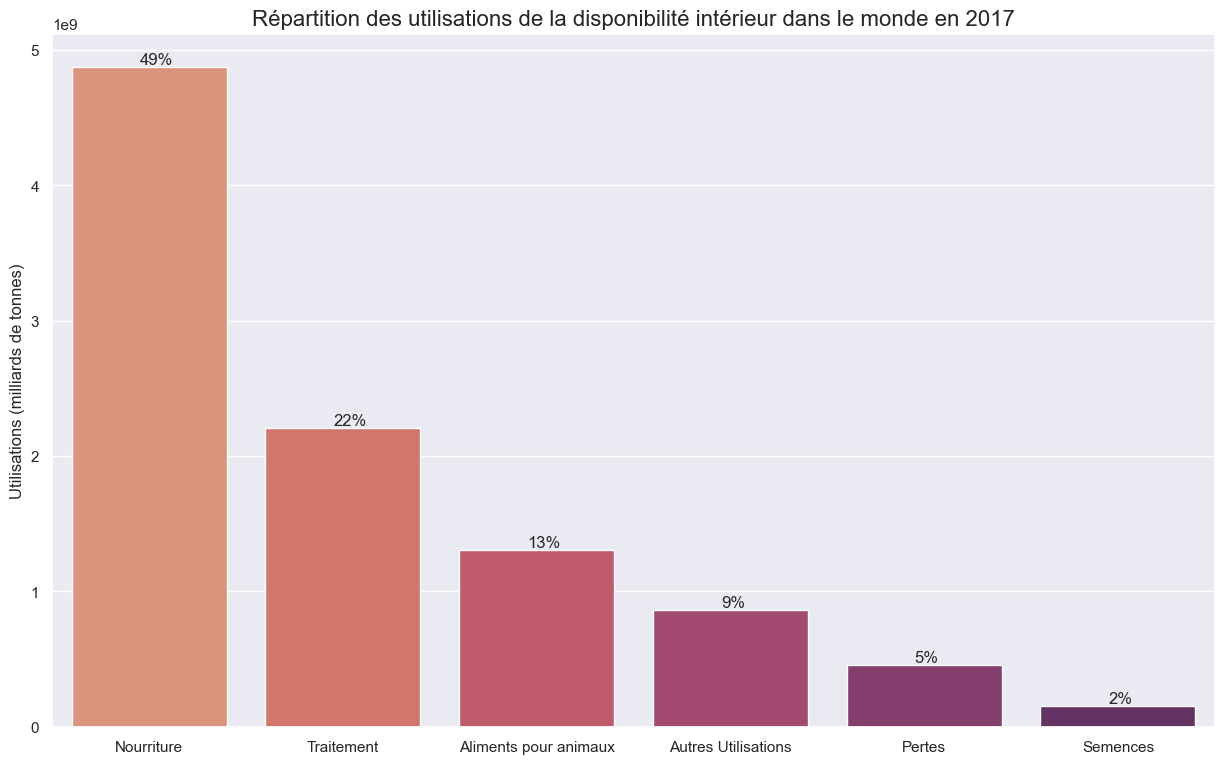

In [56]:
plt.figure(figsize=(15,9))

sns.barplot(data=df_utilisations_disponibilite_interieur_total_mondial_desc, x="Catégorie d'utilisation", y='Utilisations')
plt.title("Répartition des utilisations de la disponibilité intérieur dans le monde en 2017", fontsize=16)

plt.xlabel(None)
plt.ylabel('Utilisations (milliards de tonnes)')

for i in range(df_utilisations_disponibilite_interieur_total_mondial_desc["Catégorie d'utilisation"].shape[0]):
    plt.text(i-0.05, df_utilisations_disponibilite_interieur_total_mondial_desc.iloc[i,1]+0.2e8, 
             '{:.0%}'.format(df_utilisations_disponibilite_interieur_total_mondial_desc.iloc[i,1]/df_utilisations_disponibilite_interieur_total_mondial_desc['Utilisations'].sum()))

plt.show()

On voit que seulement 49% de la disponibilité intérieur est consacrée à l'alimentation humaine et que 22% est utilisé pour le Traitement (biochimie...). On peut imaginer que les terres utilisées pour cultiver ces 'Traitement' ne sont pas utilisées pour l'alimentation humaine dans certains pays ou la sous nutrition est élevée.

<a id='question_5'></a>
# Questions 5 :
# Quelle est l'utilisation des céréales ? Et plus particulièrement, quelle est la répartition entre l'alimentation humaine et l'alimentation pour animaux ?
### On ira chercher la liste des céréales sur le site de la FAO dans Bilans alimentaires pour sélectionner les disponibilités alimentaires des produits de la catégories céréale.  <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

### Import du fichier céréales issue du site de la FAO

In [57]:
cereale=pd.read_csv(folder+'FAOSTAT_cereales.csv')
cereale

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5521,Aliments pour animaux,S2511,Blé et produits,2017,2017,Milliers de tonnes,221,I,Valeur imputée
1,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5142,Nourriture,S2511,Blé et produits,2017,2017,Milliers de tonnes,5944,I,Valeur imputée
2,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5521,Aliments pour animaux,S2807,Riz et produits,2017,2017,Milliers de tonnes,4,I,Valeur imputée
3,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5142,Nourriture,S2807,Riz et produits,2017,2017,Milliers de tonnes,700,I,Valeur imputée
4,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5521,Aliments pour animaux,S2513,Orge et produits,2017,2017,Milliers de tonnes,67,I,Valeur imputée
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,FBS,Bilans Alimentaires (2010-),716,Zimbabwe,5142,Nourriture,S2517,Millet et produits,2017,2017,Milliers de tonnes,24,I,Valeur imputée
2717,FBS,Bilans Alimentaires (2010-),716,Zimbabwe,5521,Aliments pour animaux,S2518,Sorgho et produits,2017,2017,Milliers de tonnes,0,I,Valeur imputée
2718,FBS,Bilans Alimentaires (2010-),716,Zimbabwe,5142,Nourriture,S2518,Sorgho et produits,2017,2017,Milliers de tonnes,41,I,Valeur imputée
2719,FBS,Bilans Alimentaires (2010-),716,Zimbabwe,5521,Aliments pour animaux,S2520,"Céréales, Autres",2017,2017,Milliers de tonnes,0,I,Valeur imputée


### Création liste céréales d'après le fichier sur le site internet de la FAO

In [58]:
liste_cereale_FAO=list(cereale['Produit'].unique())
liste_cereale_FAO

['Blé et produits',
 'Riz et produits',
 'Orge et produits',
 'Maïs et produits',
 'Seigle et produits',
 'Avoine',
 'Millet et produits',
 'Sorgho et produits',
 'Céréales, Autres']

### Création d'une nouvelle liste avec la correspondance des noms de céréales de mon fichier dispo_alimentaire (car différent)

In [59]:
liste_cereale_new=['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', "Céréales, Autres"]

In [60]:
# Renvoie les lignes en cherchant si une colonne contient une chaine de caractères 
df_dispo_alimentaire[df_dispo_alimentaire['Produit_disponibilite'].str.contains('Céréales')]

,Pays,Produit_disponibilite,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,Afrique du Sud,"Céréales, Autres",vegetale,8000.0,0.0,1.0,0.19,0.00,0.02,12000.0,10000.0,3000.0,4000.0,0.0,19000.0,0.0,0.0,0.0
176,Albanie,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.22,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
267,Algérie,"Céréales, Autres",vegetale,2000.0,0.0,0.0,0.08,0.00,0.01,4000.0,0.0,4000.0,1000.0,0.0,0.0,0.0,0.0,0.0
361,Allemagne,"Céréales, Autres",vegetale,2373000.0,228000.0,5.0,1.86,0.01,0.13,2778000.0,271000.0,298000.0,56000.0,53000.0,2690000.0,68000.0,0.0,60000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15173,Émirats arabes unis,"Céréales, Autres",vegetale,1000.0,1000.0,0.0,0.00,0.00,0.00,-40000.0,59000.0,21000.0,0.0,0.0,0.0,0.0,0.0,-1000.0
15266,Équateur,"Céréales, Autres",vegetale,1000.0,0.0,0.0,0.14,0.01,0.02,2000.0,1000.0,2000.0,1000.0,0.0,1000.0,0.0,0.0,0.0
15361,États-Unis d'Amérique,"Céréales, Autres",vegetale,77000.0,0.0,5.0,1.70,0.02,0.15,271000.0,91000.0,281000.0,200000.0,0.0,81000.0,3000.0,0.0,0.0
15454,Éthiopie,"Céréales, Autres",vegetale,0.0,469000.0,254.0,72.66,0.77,6.97,3274000.0,0.0,2000.0,2495000.0,234000.0,4672000.0,76000.0,0.0,-1400000.0


### Filtre de toutes les lignes concernant les céréales puis sommes des utilisations de la disponibilité intérieur

In [61]:
df_dispo_alimentaire_cereale=df_dispo_alimentaire[df_dispo_alimentaire['Produit_disponibilite'].isin(liste_cereale_new)]
df_dispo_alimentaire_cereale.reset_index(drop=True, inplace=True)
df_dispo_alimentaire_cereale

,Pays,Produit_disponibilite,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,438.99,4.69,36.91,5992000.0,0.0,1173000.0,4895000.0,775000.0,5169000.0,322000.0,0.0,-350000.0
1,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,Maïs,vegetale,200000.0,0.0,21.0,6.85,0.30,0.56,313000.0,0.0,1000.0,76000.0,31000.0,312000.0,5000.0,0.0,0.0
3,Afghanistan,Millet,vegetale,0.0,0.0,3.0,1.10,0.02,0.08,13000.0,0.0,0.0,12000.0,1000.0,13000.0,0.0,0.0,0.0
4,Afghanistan,Orge,vegetale,360000.0,0.0,26.0,8.00,0.24,0.79,524000.0,0.0,10000.0,89000.0,52000.0,514000.0,22000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,Îles Salomon,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1493,Îles Salomon,Maïs,vegetale,0.0,0.0,1.0,0.41,0.01,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1494,Îles Salomon,Orge,vegetale,0.0,0.0,0.0,0.19,0.00,0.01,1000.0,0.0,1000.0,0.0,0.0,0.0,0.0,1000.0,0.0
1495,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12000.0,623.0,174.68,1.36,10.90,49000.0,0.0,47000.0,36000.0,1000.0,3000.0,0.0,0.0,0.0


In [62]:
# Garde les colonnes qui nous intéresse (utilisations)
# Fait la somme des utilisations
# Classe par ordre décroissant
df_dispo_alimentaire_cereale_2=df_dispo_alimentaire_cereale.iloc[:,[3,4,12,13,15,16]]
df_utilisation_totale_cereale=df_dispo_alimentaire_cereale_2.sum()
df_utilisation_totale_cereale=df_utilisation_totale_cereale.sort_values(ascending=False)
df_utilisation_totale_cereale

Nourriture               1.029010e+09
Aliments pour animaux    8.735350e+08
Autres Utilisations      2.347870e+08
Pertes                   1.071200e+08
Traitement               9.458900e+07
Semences                 6.853800e+07
dtype: float64

<a id='reponse_question_5'></a>
## Réponse Question 5<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

In [63]:
print ("Voici les utilisations des céréales dans le monde en 2017:")

for quantite_utilisation, i in zip(df_utilisation_totale_cereale, range(df_utilisation_totale_cereale.shape[0])):
    print('- '+ df_utilisation_totale_cereale.index[i],'{:.0%}'.format(quantite_utilisation/df_utilisation_totale_cereale.sum())+' soit '+'{:,}'.format(int(quantite_utilisation)).replace(',',' ')+' tonnes.')

Voici les utilisations des céréales dans le monde en 2017:
- Nourriture 43% soit 1 029 010 000 tonnes.
- Aliments pour animaux 36% soit 873 535 000 tonnes.
- Autres Utilisations 10% soit 234 787 000 tonnes.
- Pertes 4% soit 107 120 000 tonnes.
- Traitement 4% soit 94 589 000 tonnes.
- Semences 3% soit 68 538 000 tonnes.


## Visualisation

In [64]:
df_visualisation_5=pd.melt(df_dispo_alimentaire_cereale_2, value_vars=['Aliments pour animaux',
                                                                       'Autres Utilisations',
                                                                       'Nourriture', 'Pertes','Semences', 'Traitement'],
                           var_name="categorie_utilisation", value_name="valeur_utilisation")
df_visualisation_5

,categorie_utilisation,valeur_utilisation
0,Aliments pour animaux,0.0
1,Aliments pour animaux,0.0
2,Aliments pour animaux,200000.0
3,Aliments pour animaux,0.0
4,Aliments pour animaux,360000.0
...,...,...
8977,Traitement,0.0
8978,Traitement,0.0
8979,Traitement,1000.0
8980,Traitement,0.0


In [65]:
df_visualisation_finale_5=df_visualisation_5.groupby("categorie_utilisation")[["valeur_utilisation"]].sum()
df_visualisation_finale_5_desc=df_visualisation_finale_5.sort_values('valeur_utilisation', ascending=False)
df_visualisation_finale_5_desc=df_visualisation_finale_5_desc.reset_index()
df_visualisation_finale_5_desc

,categorie_utilisation,valeur_utilisation
0,Nourriture,1.029010e+09
1,Aliments pour animaux,8.735350e+08
2,Autres Utilisations,2.347870e+08
3,Pertes,1.071200e+08
4,Traitement,9.458900e+07
5,Semences,6.853800e+07


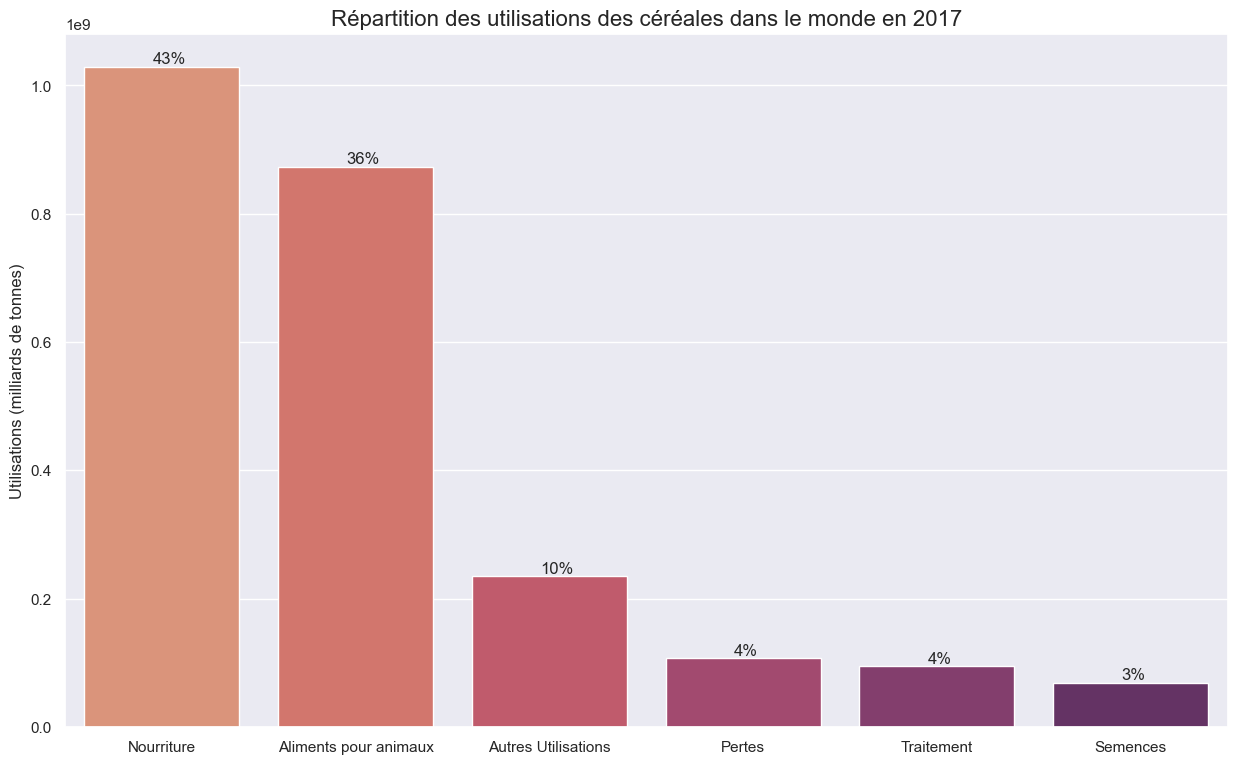

In [66]:
plt.figure(figsize=(15,9))

sns.barplot(data=df_visualisation_finale_5_desc, x='categorie_utilisation', y='valeur_utilisation')
plt.title("Répartition des utilisations des céréales dans le monde en 2017", fontsize=16)

plt.xlabel(None)
plt.ylabel('Utilisations (milliards de tonnes)')

for i in range(len(df_visualisation_finale_5_desc["categorie_utilisation"])):
    plt.text(i-0.05, df_visualisation_finale_5_desc.iloc[i,1]+0.5e7, '{:.0%}'.format(df_visualisation_finale_5_desc.iloc[i,1]/df_visualisation_finale_5_desc['valeur_utilisation'].sum()))

plt.show()

On remarque que pour les céréales, presque la même part est utilisée pour l'alimentation humaine que animale.

<a id="question_6" ></a>
## Question 6 : 
## Comment est utilisé le manioc en Thaïlande ? Et plus particulièrement quelle est la part de l’exportation comparé à la production ? Quelles conclusions peut-on en tirer aux égards de la proportion de personnes en sous nutrition ? <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

In [67]:
df_dispo_alimentaire.head()

,Pays,Produit_disponibilite,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,4.71,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,3.53,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.16,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,7.40,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


### Création Dataframe du manioc en thailande

In [68]:
df_manioc_thailande=df_dispo_alimentaire.loc[(df_dispo_alimentaire['Pays']=='Thaïlande'
                                             ) & (df_dispo_alimentaire['Produit_disponibilite']=='Manioc'),:]
df_manioc_thailande.reset_index(drop=True, inplace=True)
df_manioc_thailande

,Pays,Produit_disponibilite,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Thaïlande,Manioc,vegetale,1800000.0,2081000.0,40.0,35.62,0.05,0.14,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,0.0,0.0,0.0


### Affichage uniquement des dispos intérieurs

In [69]:
df_variable_dispo_interieur=df_manioc_thailande.iloc[:,[9,14,11,10,17,3,4,12,13,15,16]]
df_variable_dispo_interieur

,Disponibilité intérieure,Production,Importations - Quantité,Exportations - Quantité,Variation de stock,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement
0,6264000.0,30228000.0,1250000.0,25214000.0,0.0,1800000.0,2081000.0,871000.0,1511000.0,0.0,0.0


In [70]:
# df dispos intérieurs moyens d'acquisition
df_variable_dispo_interieur_moyen_acquisition=df_manioc_thailande.iloc[:,[9,14,10,11,17]]
df_variable_dispo_interieur_moyen_acquisition

,Disponibilité intérieure,Production,Exportations - Quantité,Importations - Quantité,Variation de stock
0,6264000.0,30228000.0,25214000.0,1250000.0,0.0


In [71]:
# df dispos intérieurs utilisations
df_variable_dispo_interieur_utilisation=df_manioc_thailande.iloc[:,[9,3,4,12,13,15,16]]
df_variable_dispo_interieur_utilisation

,Disponibilité intérieure,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement
0,6264000.0,1800000.0,2081000.0,871000.0,1511000.0,0.0,0.0


### Melt pour la visualisation

In [72]:
df_variable_dispo_interieur_melt=pd.melt(df_variable_dispo_interieur, value_vars=df_variable_dispo_interieur.iloc[:,:], var_name="variable", value_name="valeur")
df_variable_dispo_interieur_melt

,variable,valeur
0,Disponibilité intérieure,6264000.0
1,Production,30228000.0
2,Importations - Quantité,1250000.0
3,Exportations - Quantité,25214000.0
4,Variation de stock,0.0
5,Aliments pour animaux,1800000.0
6,Autres Utilisations,2081000.0
7,Nourriture,871000.0
8,Pertes,1511000.0
9,Semences,0.0


<a id='reponse_question_6'></a>
## Réponse et visualisations Question 6 <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

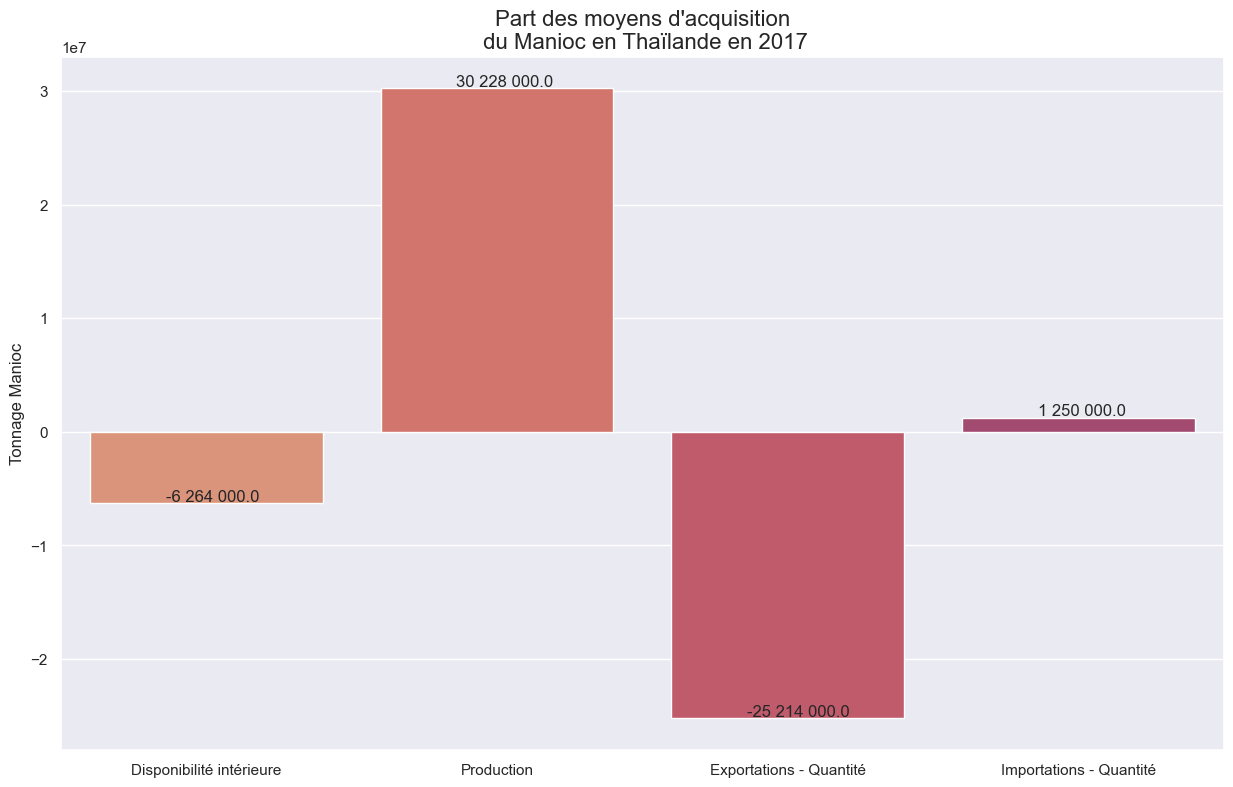

In [73]:
# melt variables moyen d'acquisition + passage au négatif de disponibilités intérieurs et exportations 
df_variable_dispo_interieur_moyen_acquisition_melt=pd.melt(df_variable_dispo_interieur_moyen_acquisition, 
                                                           value_vars=df_variable_dispo_interieur_moyen_acquisition.iloc[:,0:4], var_name="moyen_acquisition", value_name="valeur")
df_variable_dispo_interieur_moyen_acquisition_melt.loc[df_variable_dispo_interieur_moyen_acquisition_melt['moyen_acquisition']=='Disponibilité intérieure','valeur']=-df_variable_dispo_interieur_moyen_acquisition_melt.loc[df_variable_dispo_interieur_moyen_acquisition_melt['moyen_acquisition']=='Disponibilité intérieure','valeur']
df_variable_dispo_interieur_moyen_acquisition_melt.loc[df_variable_dispo_interieur_moyen_acquisition_melt['moyen_acquisition']=='Exportations - Quantité','valeur']=-df_variable_dispo_interieur_moyen_acquisition_melt.loc[df_variable_dispo_interieur_moyen_acquisition_melt['moyen_acquisition']=='Exportations - Quantité','valeur']


plt.figure(figsize=(15,9))


sns.barplot(data=df_variable_dispo_interieur_moyen_acquisition_melt, x='moyen_acquisition', y='valeur')
plt.title("Part des moyens d'acquisition\n du Manioc en Thaïlande en 2017", fontsize=16)

plt.xlabel(None)
plt.ylabel('Tonnage Manioc')

for i in range(len(df_variable_dispo_interieur_moyen_acquisition_melt["moyen_acquisition"])):
    plt.text(i-0.14, df_variable_dispo_interieur_moyen_acquisition_melt.iloc[i,1]+0.2e6, '{:,}'.format(df_variable_dispo_interieur_moyen_acquisition_melt.iloc[i,1]).replace(',',' '))

plt.show()

Pour rappel on a : 
    Disponibilité intérieur (Moyens d'acquisition) = Production + Importation + Variation de stock – Exportation
    
<=> Production = Disponibilité intérieur + Exportation - Importation - Variation de stock 

<=> Disponibilité intérieur + Exportation =  Production + Importation

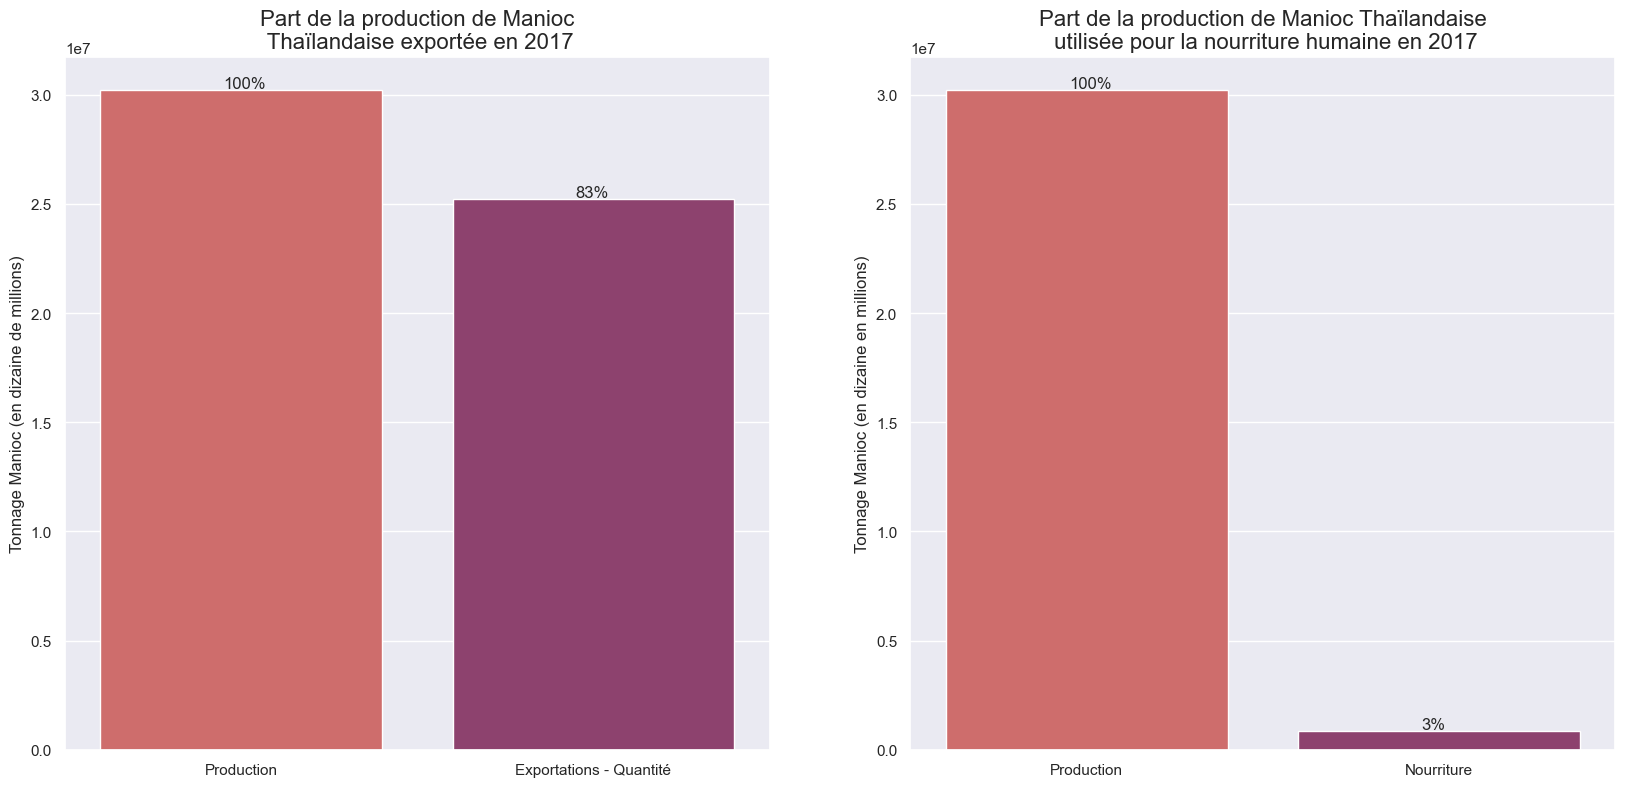

In [74]:
# diagramme en barre exportation manioc et nourriture

plt.figure(figsize=(20,9))

plt.subplot(1,2,1)

sns.barplot(data=df_variable_dispo_interieur_melt.iloc[[1,3],:], x='variable', y='valeur', palette='flare')
plt.title("Part de la production de Manioc\n Thaïlandaise exportée en 2017", fontsize=16)

plt.xlabel(None)
plt.ylabel('Tonnage Manioc (en dizaine de millions)')

plt.text(1-0.05, df_variable_dispo_interieur_melt.iloc[3,1]+1e5,
         '{:.0%}'.format(df_variable_dispo_interieur_melt.iloc[3,1]/df_variable_dispo_interieur_melt.iloc[1,1]))
plt.text(0-0.05, df_variable_dispo_interieur_melt.iloc[1,1]+1e5,
         '{:.0%}'.format(df_variable_dispo_interieur_melt.iloc[1,1]/df_variable_dispo_interieur_melt.iloc[1,1]))


plt.subplot(1,2,2)

sns.barplot(data=df_variable_dispo_interieur_melt.iloc[[1,7],:], x='variable', y='valeur', palette='flare')
plt.title("Part de la production de Manioc Thaïlandaise\n utilisée pour la nourriture humaine en 2017", fontsize=16)

plt.xlabel(None)
plt.ylabel('Tonnage Manioc (en dizaine en millions)')

plt.text(0-0.05, df_variable_dispo_interieur_melt.iloc[1,1]+1e5,
         '{:.0%}'.format(df_variable_dispo_interieur_melt.iloc[1,1]/df_variable_dispo_interieur_melt.iloc[1,1]))
plt.text(1-0.05, df_variable_dispo_interieur_melt.iloc[7,1]+1e5,
         '{:.0%}'.format(df_variable_dispo_interieur_melt.iloc[7,1]/df_variable_dispo_interieur_melt.iloc[1,1]))
    
plt.show()

On peut voir sur ces graphiques que 83% de la production annuelle de 2017 est exportée et que seulement 3% est utilisée pour la nourriture humaine. Or, la Thaïlande compte 6 200 000 personnes en état de sous nutrition, nous allons voir si une partie de ce problème ne pourrait pas être réglé en consacrant une partie du Manioc exporté pour l'alimentation humaine en considérant un besoin énergétique nécessaire de 2300 kcal/personne/jour.

In [75]:
# 871 000 tonnes de manioc pour 40 kcal/personne/jour*69 209 810 habitants--> 2 768 392 400 kcal/jour en tout 
# on divise par le nombre de personne en sous nutrition

# définition des variables

quantite_manioc_nourriture=df_manioc_thailande['Nourriture'].values[0]
population_thailande=df_population.loc[(df_population['Pays']=='Thaïlande')&(df_population['Année']==2017),
                                       'Population'].values[0]
dispo_alimentaire_manioc=df_manioc_thailande['Disponibilité alimentaire (Kcal/personne/jour)'].values[0]
population_sous_nutrition_thailande=df_sous_nutrition.loc[(df_sous_nutrition['Pays']=='Thaïlande') & (df_sous_nutrition['Année']==2017),
                                                          'Population_en_sous_nutrition'].values[0]

In [76]:
# 871 000 tonnes de manioc pour 40 kcal/personne/jour*69 209 810 habitants--> 2 768 392 400 kcal/jour en tout 
# on divise ensuite par le nombre de personne en état de sous nutrition pour déterminer la disponibilité alimentaire du manioc pour les personnes en sous nutrition
# cela signifie que 871 000 tonnes de manioc permmetrait de donner 446 kcal/personne/jour aux 6 200 000 personnes en état de sous nutrition.

dispo_alimentaire_manioc_sous_nutrition=dispo_alimentaire_manioc*population_thailande/population_sous_nutrition_thailande
dispo_alimentaire_manioc_sous_nutrition

446.51490322580645

In [77]:
# on va voir combien de tonnes de manioc apporteraient 2300 kcal/personne/jour
# 871 000 tonnes apportent 446 kcal/personne/jour, combien pour 2300 ?

tonnage_manioc_necessaire=quantite_manioc_nourriture*2300/dispo_alimentaire_manioc_sous_nutrition
tonnage_manioc_necessaire='{:,}'.format(int(tonnage_manioc_necessaire)).replace(',',' ')
tonnage_manioc_necessaire

'4 486 524'

In [78]:
f"Il faudrait {tonnage_manioc_necessaire} tonnes de manioc pour nourrir les 6 200 000 personnes en état de sous nutrition en Thaïlande (en considérant qu'il ne mange pas du tout à l'heure actuelle), ce qui correspond à environ 1/5 des exportations."

"Il faudrait 4 486 524 tonnes de manioc pour nourrir les 6 200 000 personnes en état de sous nutrition en Thaïlande (en considérant qu'il ne mange pas du tout à l'heure actuelle), ce qui correspond à environ 1/5 des exportations."

## Conclusion

En Thaïlande en 2017, 83% du Manioc produit a été exporté et seulement 3% a été utilisé pour l'alimentation humaine.

D'autre part, on a 6 200 000 personnes en état de sous nutrition dans le pays. En faisant l'hypothèse que 2300 kcal/personne/jour sont nécessaires (et que les personnes en sous nutrition ne mange pas actuellement), 1/5 des exportations de manioc environ suffirait pour nourrir ces 6 200 000 personnes soit 4 486 524 tonnes de manioc.

<a id='question_7'></a>
## Question 7 :
## Pour quels pays la proportion des sous alimentés est la plus forte en 2017 ? <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

### Réutilisation du Df de la question 1

In [79]:
df_sous_nutrition_population

,Pays,Année,Population_en_sous_nutrition,Population
0,Afghanistan,2013,8600000,32269589
1,Afghanistan,2014,8800000,33370794
2,Afghanistan,2015,8900000,34413603
3,Afghanistan,2016,9700000,35383032
4,Afghanistan,2017,10500000,36296113
...,...,...,...,...
1213,Zimbabwe,2014,0,13586707
1214,Zimbabwe,2015,0,13814629
1215,Zimbabwe,2016,0,14030331
1216,Zimbabwe,2017,0,14236595


### On filtre sur 2017

In [80]:
df_sous_nutrition_population_2017=df_sous_nutrition_population[df_sous_nutrition_population['Année']==2017].copy()
df_sous_nutrition_population_2017.reset_index(drop=True, inplace=True)
df_sous_nutrition_population_2017

,Pays,Année,Population_en_sous_nutrition,Population
0,Afghanistan,2017,10500000,36296113
1,Afrique du Sud,2017,3100000,57009756
2,Albanie,2017,100000,2884169
3,Algérie,2017,1300000,41389189
4,Allemagne,2017,0,82658409
...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,8000000,29402484
199,Viet Nam,2017,6500000,94600648
200,Yémen,2017,0,27834819
201,Zambie,2017,0,16853599


### On calcule la proportion des personnes en sous nutrition par pays

In [81]:
df_sous_nutrition_population_2017['proportion_sous_nutrition']=df_sous_nutrition_population_2017['Population_en_sous_nutrition']/df_sous_nutrition_population_2017['Population']
df_sous_nutrition_population_2017['proportion_sous_nutrition']

0      0.289287
1      0.054377
2      0.034672
3      0.031409
4      0.000000
         ...   
198    0.272086
199    0.068710
200    0.000000
201    0.000000
202    0.000000
Name: proportion_sous_nutrition, Length: 203, dtype: float64

<a id='reponse_question_7'></a>
## Réponse Question 7<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

In [82]:
df_sous_nutrition_population_2017_desc=df_sous_nutrition_population_2017.sort_values('proportion_sous_nutrition', ascending=False).head(10)
df_sous_nutrition_population_2017_desc

,Pays,Année,Population_en_sous_nutrition,Population,proportion_sous_nutrition
78,Haïti,2017,5300000,10982366,0.482592
157,République populaire démocratique de Corée,2017,12000000,25429825,0.471887
108,Madagascar,2017,10500000,25570512,0.410629
103,Libéria,2017,1800000,4702226,0.382797
100,Lesotho,2017,800000,2091534,0.382494
183,Tchad,2017,5700000,15016753,0.379576
161,Rwanda,2017,4200000,11980961,0.350556
121,Mozambique,2017,9400000,28649018,0.328109
186,Timor-Leste,2017,400000,1243258,0.321735
0,Afghanistan,2017,10500000,36296113,0.289287


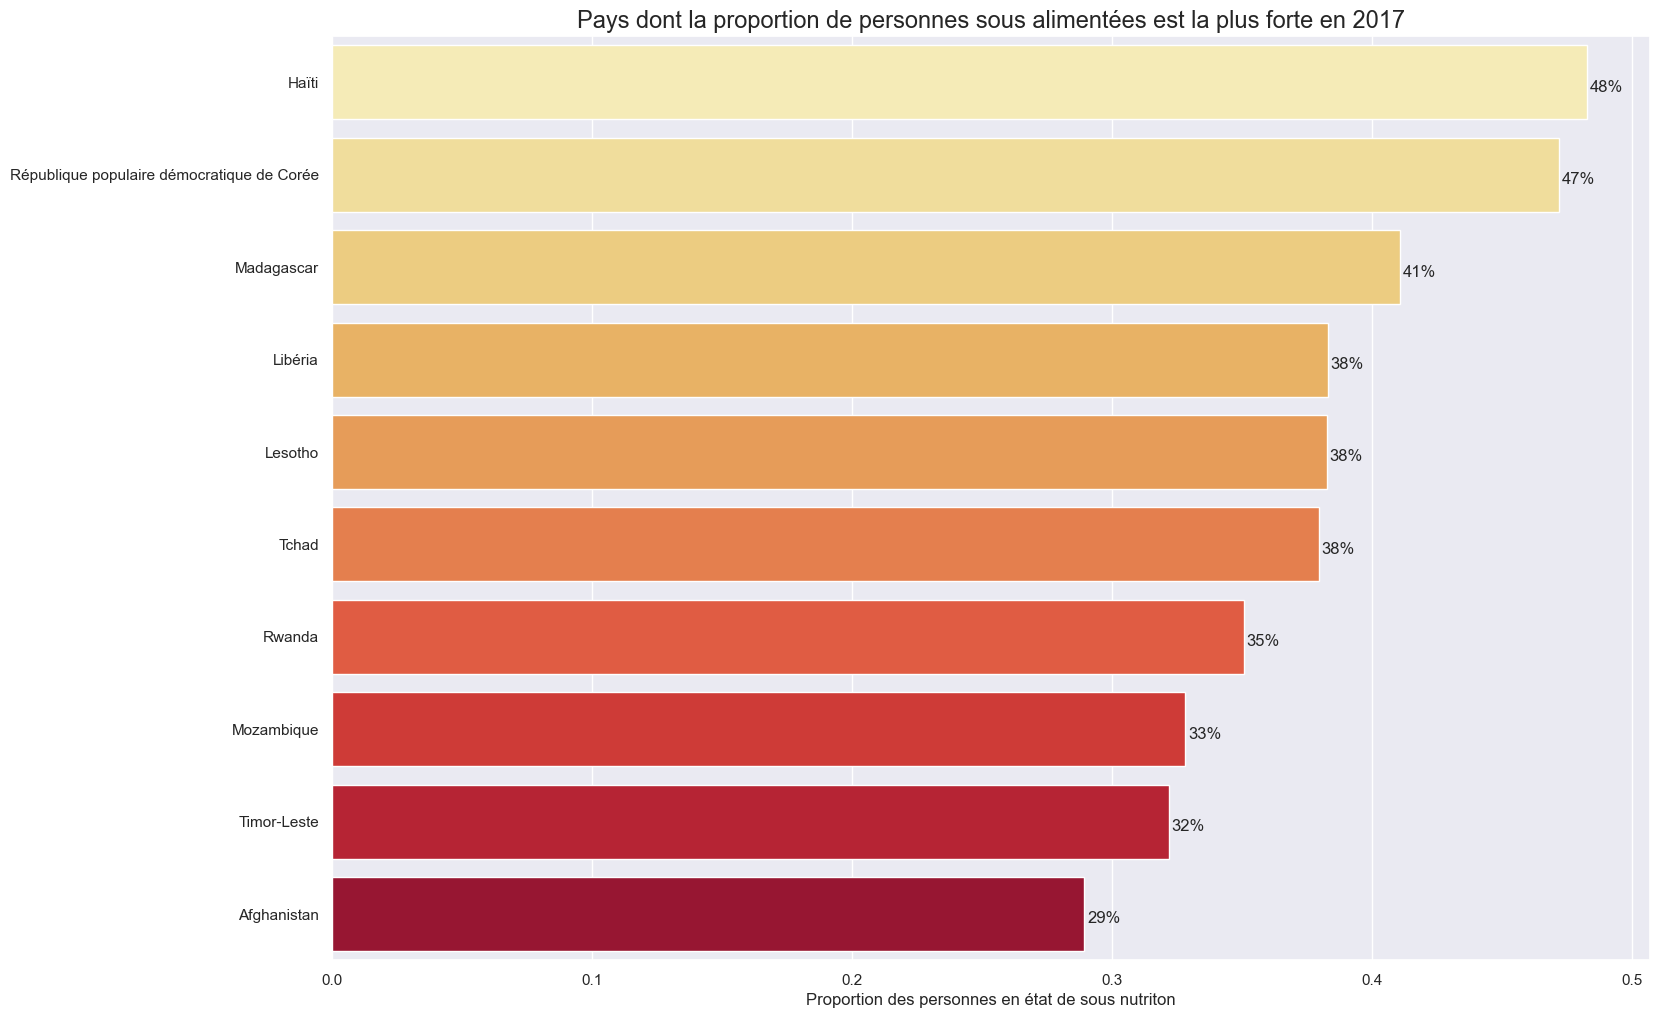

In [83]:
plt.figure(figsize=(17,12))

sns.barplot(data=df_sous_nutrition_population_2017_desc, y='Pays',
            x='proportion_sous_nutrition', orient='h', palette='YlOrRd')

plt.title('Pays dont la proportion de personnes sous alimentées est la plus forte en 2017', fontsize=17)
plt.xlabel('Proportion des personnes en état de sous nutriton')
plt.ylabel(None)


for i in range(len(df_sous_nutrition_population_2017_desc['Pays'])):
    plt.text(df_sous_nutrition_population_2017_desc.iloc[i,4]+0.001, i+0.1,
             '{:.0%}'.format(df_sous_nutrition_population_2017_desc.iloc[i,4]))

plt.show()

In [84]:
print(f'Voici les {len(df_sous_nutrition_population_2017_desc)} pays dont la proportion des personnes en état de sous nutrition est la plus élevée :\n')
for pays, proportion in zip(df_sous_nutrition_population_2017_desc['Pays'],
                            df_sous_nutrition_population_2017_desc['proportion_sous_nutrition']):
    pourcentage='{:.0%}'.format(proportion)
    print (f'- {pays}, avec {pourcentage} des habitants en état de sous nutrition')

Voici les 10 pays dont la proportion des personnes en état de sous nutrition est la plus élevée :

- Haïti, avec 48% des habitants en état de sous nutrition
- République populaire démocratique de Corée, avec 47% des habitants en état de sous nutrition
- Madagascar, avec 41% des habitants en état de sous nutrition
- Libéria, avec 38% des habitants en état de sous nutrition
- Lesotho, avec 38% des habitants en état de sous nutrition
- Tchad, avec 38% des habitants en état de sous nutrition
- Rwanda, avec 35% des habitants en état de sous nutrition
- Mozambique, avec 33% des habitants en état de sous nutrition
- Timor-Leste, avec 32% des habitants en état de sous nutrition
- Afghanistan, avec 29% des habitants en état de sous nutrition


Cependant, de nombreuses données sont manquantes concernant la sous nutrition, seulement **87 des 236 pays** du fichier population ont fournis des données sur la sous nutrition de leur pays. Parmis les pays où nous n'avons pas de données sur la sous nutrition, il y a en plusieurs ayant des disponibilités alimentaires très faible ou bénéficiant de beaucoup d'aides alimentaires et donc potentiellement ayant une part importante de leur population en sous nutrition.

Nous verrons ces chiffres en détails plus tard.

<a id='question_8'></a>
## Question 8 : Quels sont les pays qui ont bénéficiés de plus d’aides depuis 2013 ? <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

### Agrégation des aides alimentaires par pays et classement par ordre décroissant

In [85]:
df_pays_aide_alimentaire=df_aide_alimentaire.groupby('Pays')[['Tonnage aide alimentaire']].sum().sort_values('Tonnage aide alimentaire', ascending=False).reset_index()
df_pays_aide_alimentaire

,Pays,Tonnage aide alimentaire
0,République arabe syrienne,1858943
1,Éthiopie,1381294
2,Yémen,1206484
3,Soudan du Sud,695248
4,Soudan,669784
...,...,...
71,Égypte,1122
72,Vanuatu,802
73,Timor-Leste,116
74,Géorgie,70


<a id='reponse_question_8'></a>
## Réponse Question 8<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

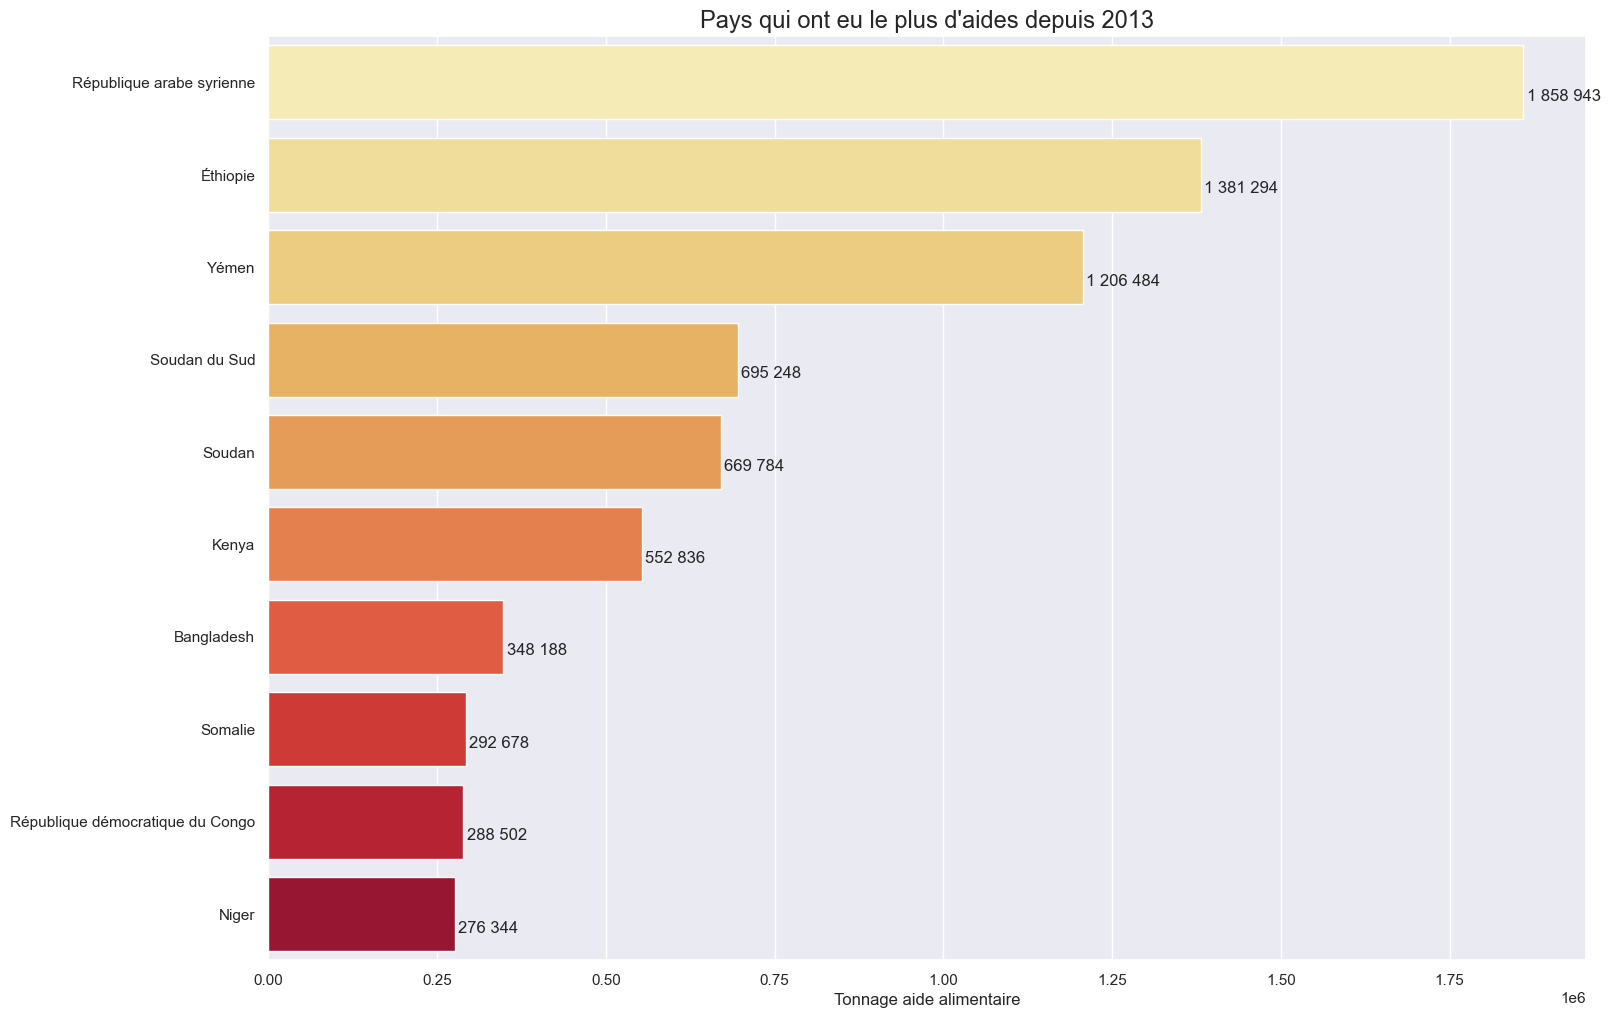

In [86]:
df_pays_aide_alimentaire_vis=df_pays_aide_alimentaire.head(10)

plt.figure(figsize=(17,12))

sns.barplot(data=df_pays_aide_alimentaire_vis, y='Pays', x='Tonnage aide alimentaire', orient='h', palette='YlOrRd')

plt.title("Pays qui ont eu le plus d'aides depuis 2013", fontsize=17)
plt.xlabel('Tonnage aide alimentaire')
plt.ylabel(None)

for i in range(len(df_pays_aide_alimentaire_vis['Pays'])):
    plt.text(df_pays_aide_alimentaire_vis.iloc[i,1]+0.5e4, i+0.2,
             '{:,}'.format(df_pays_aide_alimentaire_vis.iloc[i,1]).replace(',',' '))

plt.show()

On va approfondir l'étude en prenant en compte le nombre d'habitant pour chaque pays et en calculant l'aide par habitants.

### Calcul de l'aide alimentaire par habitant depuis 2013

In [87]:
df_population.head()

,Pays,Année,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113


### Moyenne des population depuis 2013 et jointure avec fichier aide alimentaire

In [88]:
df_population_moyenne=df_population.groupby('Pays')['Population'].mean().astype('int64')

In [89]:
df_pays_aide_alimentaire_population_moyenne=pd.merge(df_pays_aide_alimentaire,
                                                     df_population_moyenne, on='Pays', how='left')
df_pays_aide_alimentaire_population_moyenne

,Pays,Tonnage aide alimentaire,Population
0,République arabe syrienne,1858943,17965481
1,Éthiopie,1381294,102257220
2,Yémen,1206484,26828365
3,Soudan du Sud,695248,10724130
4,Soudan,669784,39402587
...,...,...,...
71,Égypte,1122,93430851
72,Vanuatu,802,274695
73,Timor-Leste,116,1209074
74,Géorgie,70,4022550


### Création de la colonne 'Aide alimentaire/habitant (en kg)'.

In [90]:
df_pays_aide_alimentaire_population_moyenne['Aide alimentaire/habitant (en kg)']=round(1000*df_pays_aide_alimentaire_population_moyenne['Tonnage aide alimentaire']/df_pays_aide_alimentaire_population_moyenne['Population'],2)

In [91]:
df_pays_aide_alimentaire_population_moyenne_desc=df_pays_aide_alimentaire_population_moyenne.sort_values('Aide alimentaire/habitant (en kg)', ascending=False)
df_pays_aide_alimentaire_population_moyenne_desc

,Pays,Tonnage aide alimentaire,Population,Aide alimentaire/habitant (en kg)
0,République arabe syrienne,1858943,17965481,103.47
3,Soudan du Sud,695248,10724130,64.83
2,Yémen,1206484,26828365,44.97
37,Djibouti,41296,921352,44.82
16,Palestine,169684,4589531,36.97
...,...,...,...,...
62,Iran (République islamique d'),4686,79079667,0.06
74,Géorgie,70,4022550,0.02
71,Égypte,1122,93430851,0.01
70,"Chine, continentale",1298,1410150682,0.00


### Visualisation

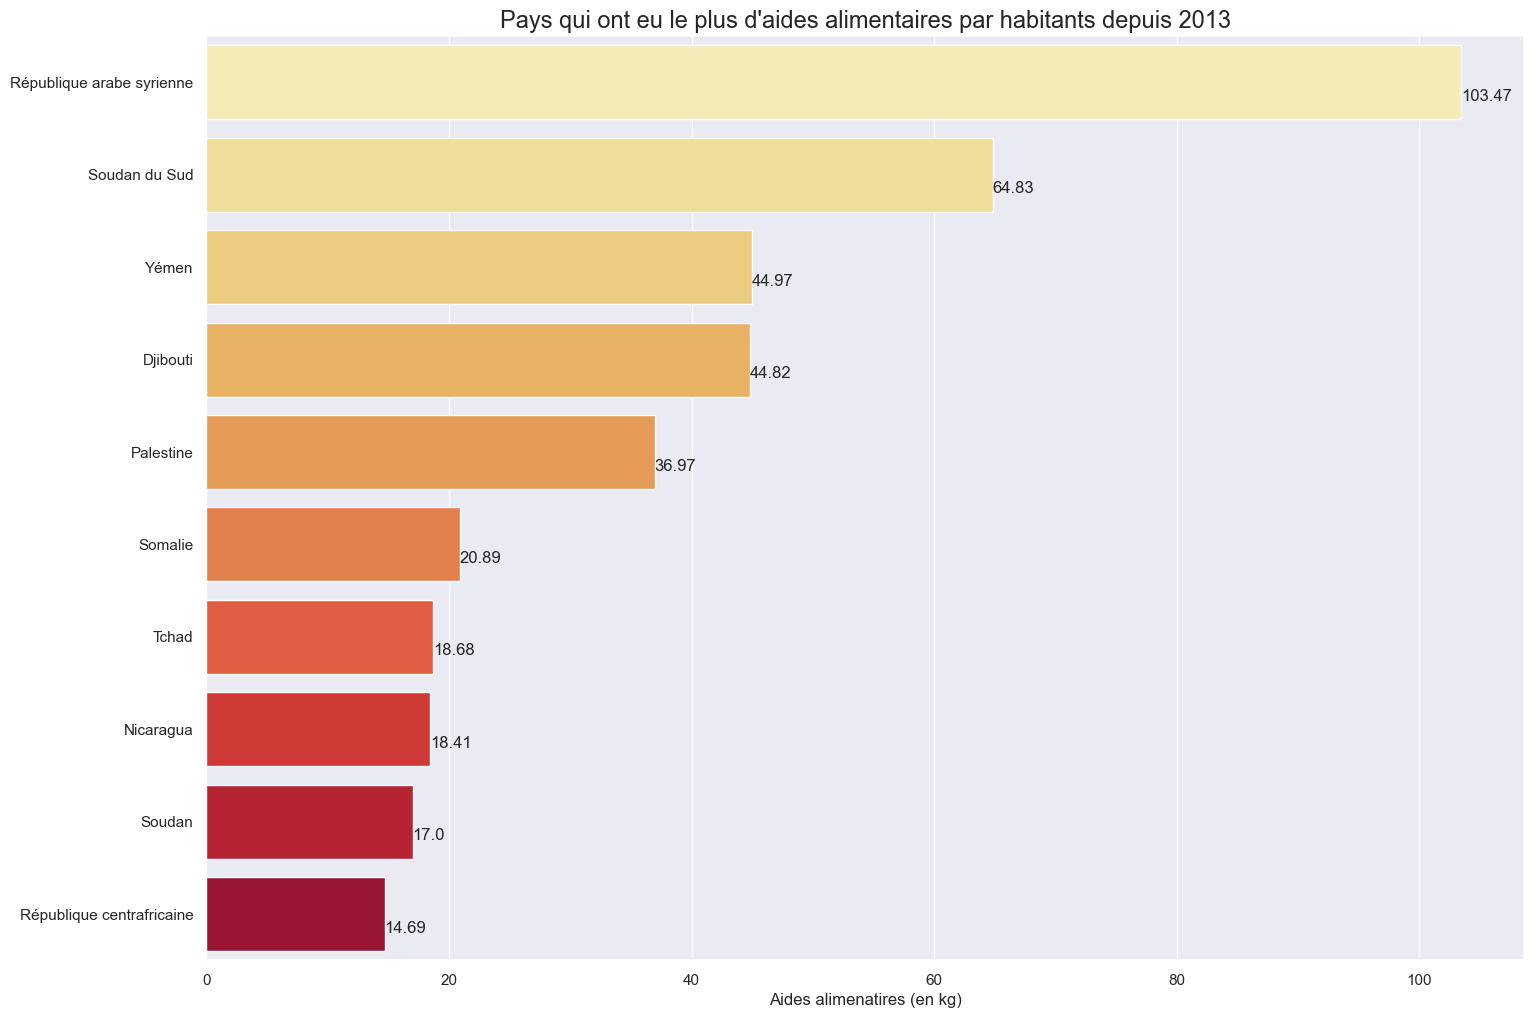

In [92]:
df_pays_aide_alimentaire_population_moyenne_desc_vis=df_pays_aide_alimentaire_population_moyenne_desc.head(10)

plt.figure(figsize=(17,12))

sns.barplot(data=df_pays_aide_alimentaire_population_moyenne_desc_vis,
            y='Pays', x='Aide alimentaire/habitant (en kg)', orient='h', palette='YlOrRd')

plt.title("Pays qui ont eu le plus d'aides alimentaires par habitants depuis 2013", fontsize=17)
plt.xlabel('Aides alimenatires (en kg)')
plt.ylabel(None)

for i in range(len(df_pays_aide_alimentaire_population_moyenne_desc_vis['Pays'])):
    plt.text(df_pays_aide_alimentaire_population_moyenne_desc_vis.iloc[i,3], i+0.2,
             df_pays_aide_alimentaire_population_moyenne_desc_vis.iloc[i,3])

plt.show()

### Comparaison des jeux de données

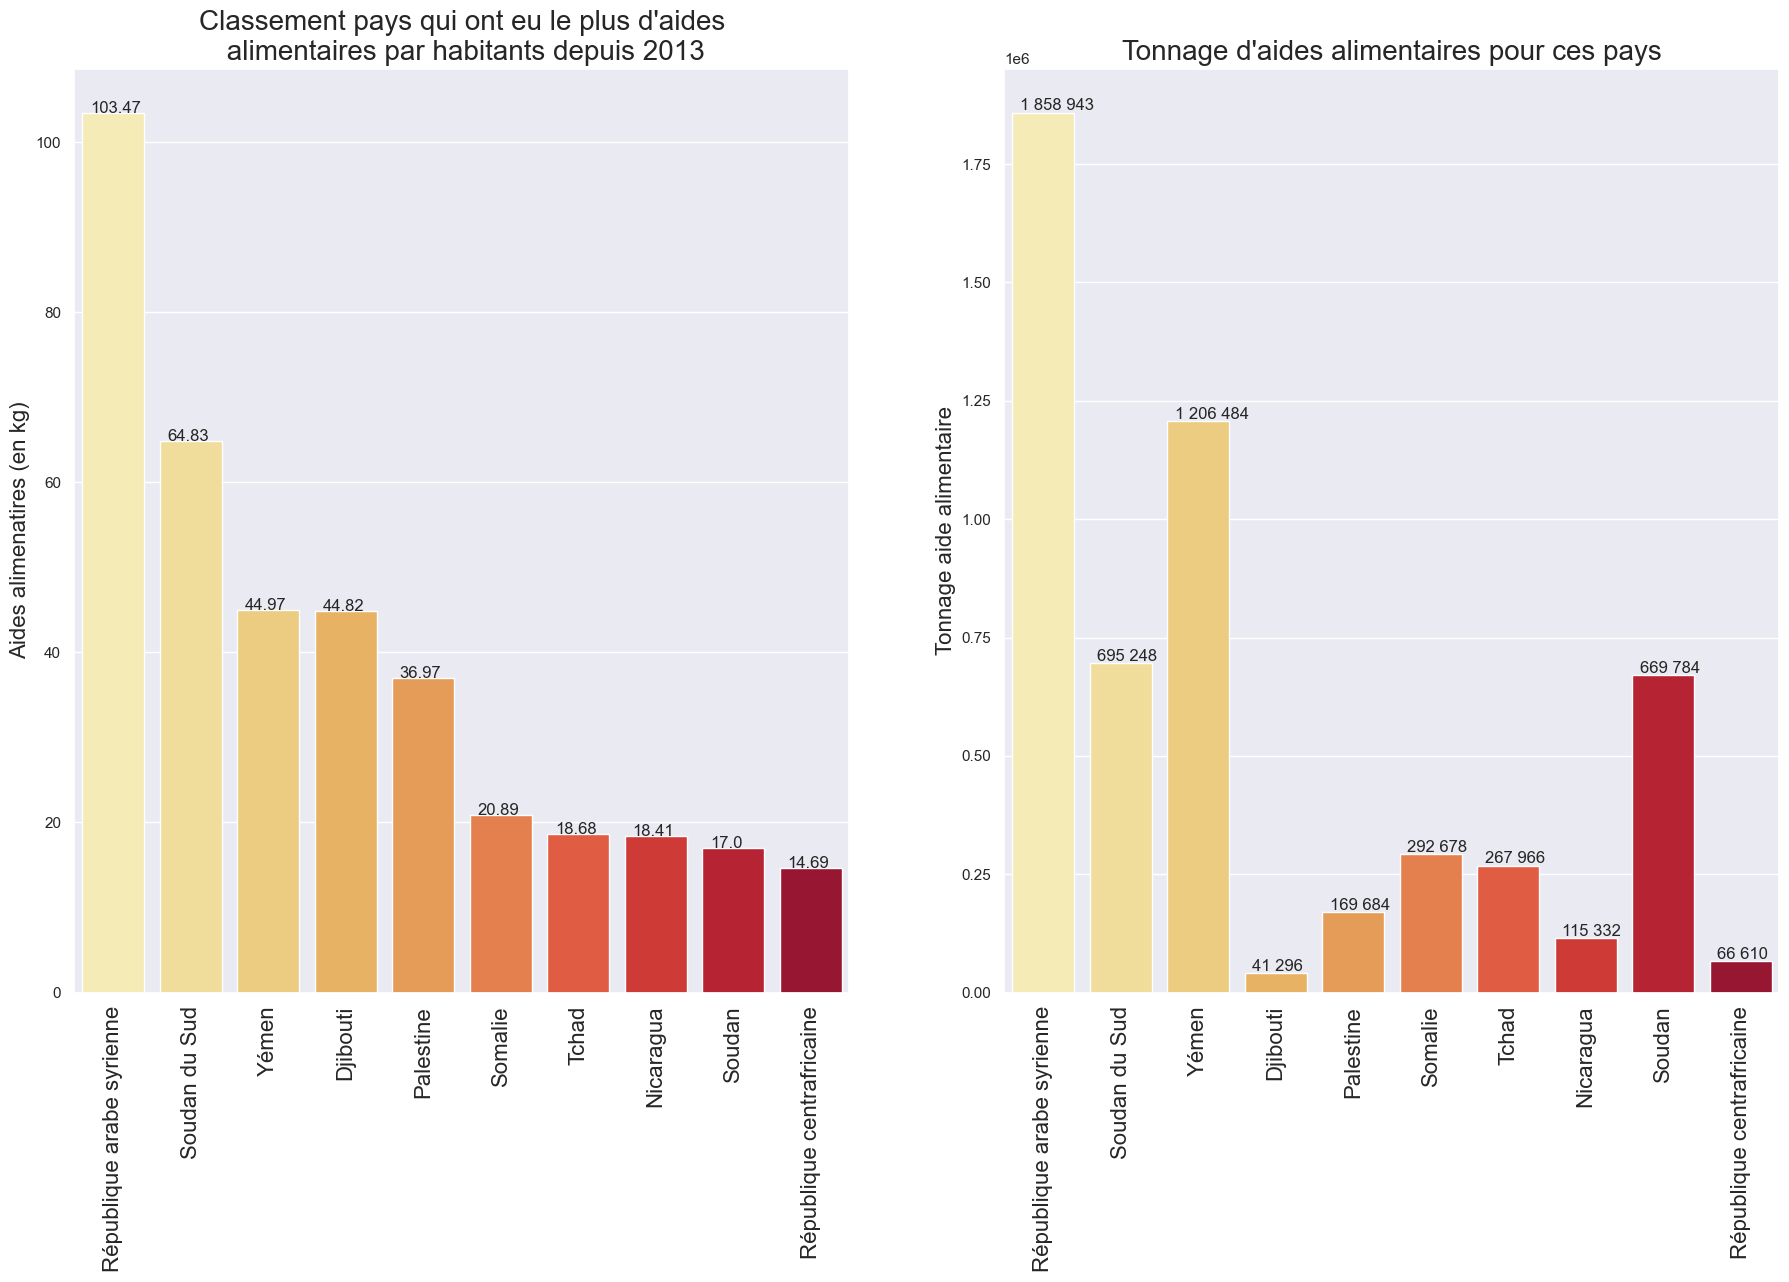

In [93]:
n=10
df_pays_aide_alimentaire_population_moyenne_desc_vis=df_pays_aide_alimentaire_population_moyenne_desc.head(n)


plt.figure(figsize=(22,12))

    
plt.subplot(1,2,1)


sns.barplot(data=df_pays_aide_alimentaire_population_moyenne_desc_vis, x='Pays',
            y='Aide alimentaire/habitant (en kg)', orient='v', palette='YlOrRd')

plt.title("Classement pays qui ont eu le plus d'aides\n alimentaires par habitants depuis 2013", fontsize=20)
plt.ylabel('Aides alimenatires (en kg)', fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=90, fontsize=16)

for i in range(len(df_pays_aide_alimentaire_population_moyenne_desc_vis['Pays'])):
    plt.text(i-0.3, df_pays_aide_alimentaire_population_moyenne_desc_vis.iloc[i,3],
             df_pays_aide_alimentaire_population_moyenne_desc_vis.iloc[i,3])


plt.subplot(1,2,2)

sns.barplot(data=df_pays_aide_alimentaire_population_moyenne_desc_vis, x='Pays', y='Tonnage aide alimentaire', orient='v', palette='YlOrRd')

plt.title("Tonnage d'aides alimentaires pour ces pays", fontsize=20)
plt.ylabel('Tonnage aide alimentaire', fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=90, fontsize=16)

for i in range(len(df_pays_aide_alimentaire_population_moyenne_desc_vis['Pays'])):
    plt.text(i-0.3,df_pays_aide_alimentaire_population_moyenne_desc_vis.iloc[i,1]+0.5e4 ,
             '{:,}'.format(df_pays_aide_alimentaire_population_moyenne_desc_vis.iloc[i,1]).replace(',',' '))
    


plt.show()

Cela met en lumière des petits pays, comme Djibouti, la Palestine, le Nicaragua ou la République centrafricaine, qui n'ont pas reçu les plus grosses quantités d'aides alimentaires mais qui rapporté au nombre d'habitants, en ont reçu beaucoup.

In [94]:
data=df_pays_aide_alimentaire_population_moyenne.sort_values('Tonnage aide alimentaire', ascending=False)

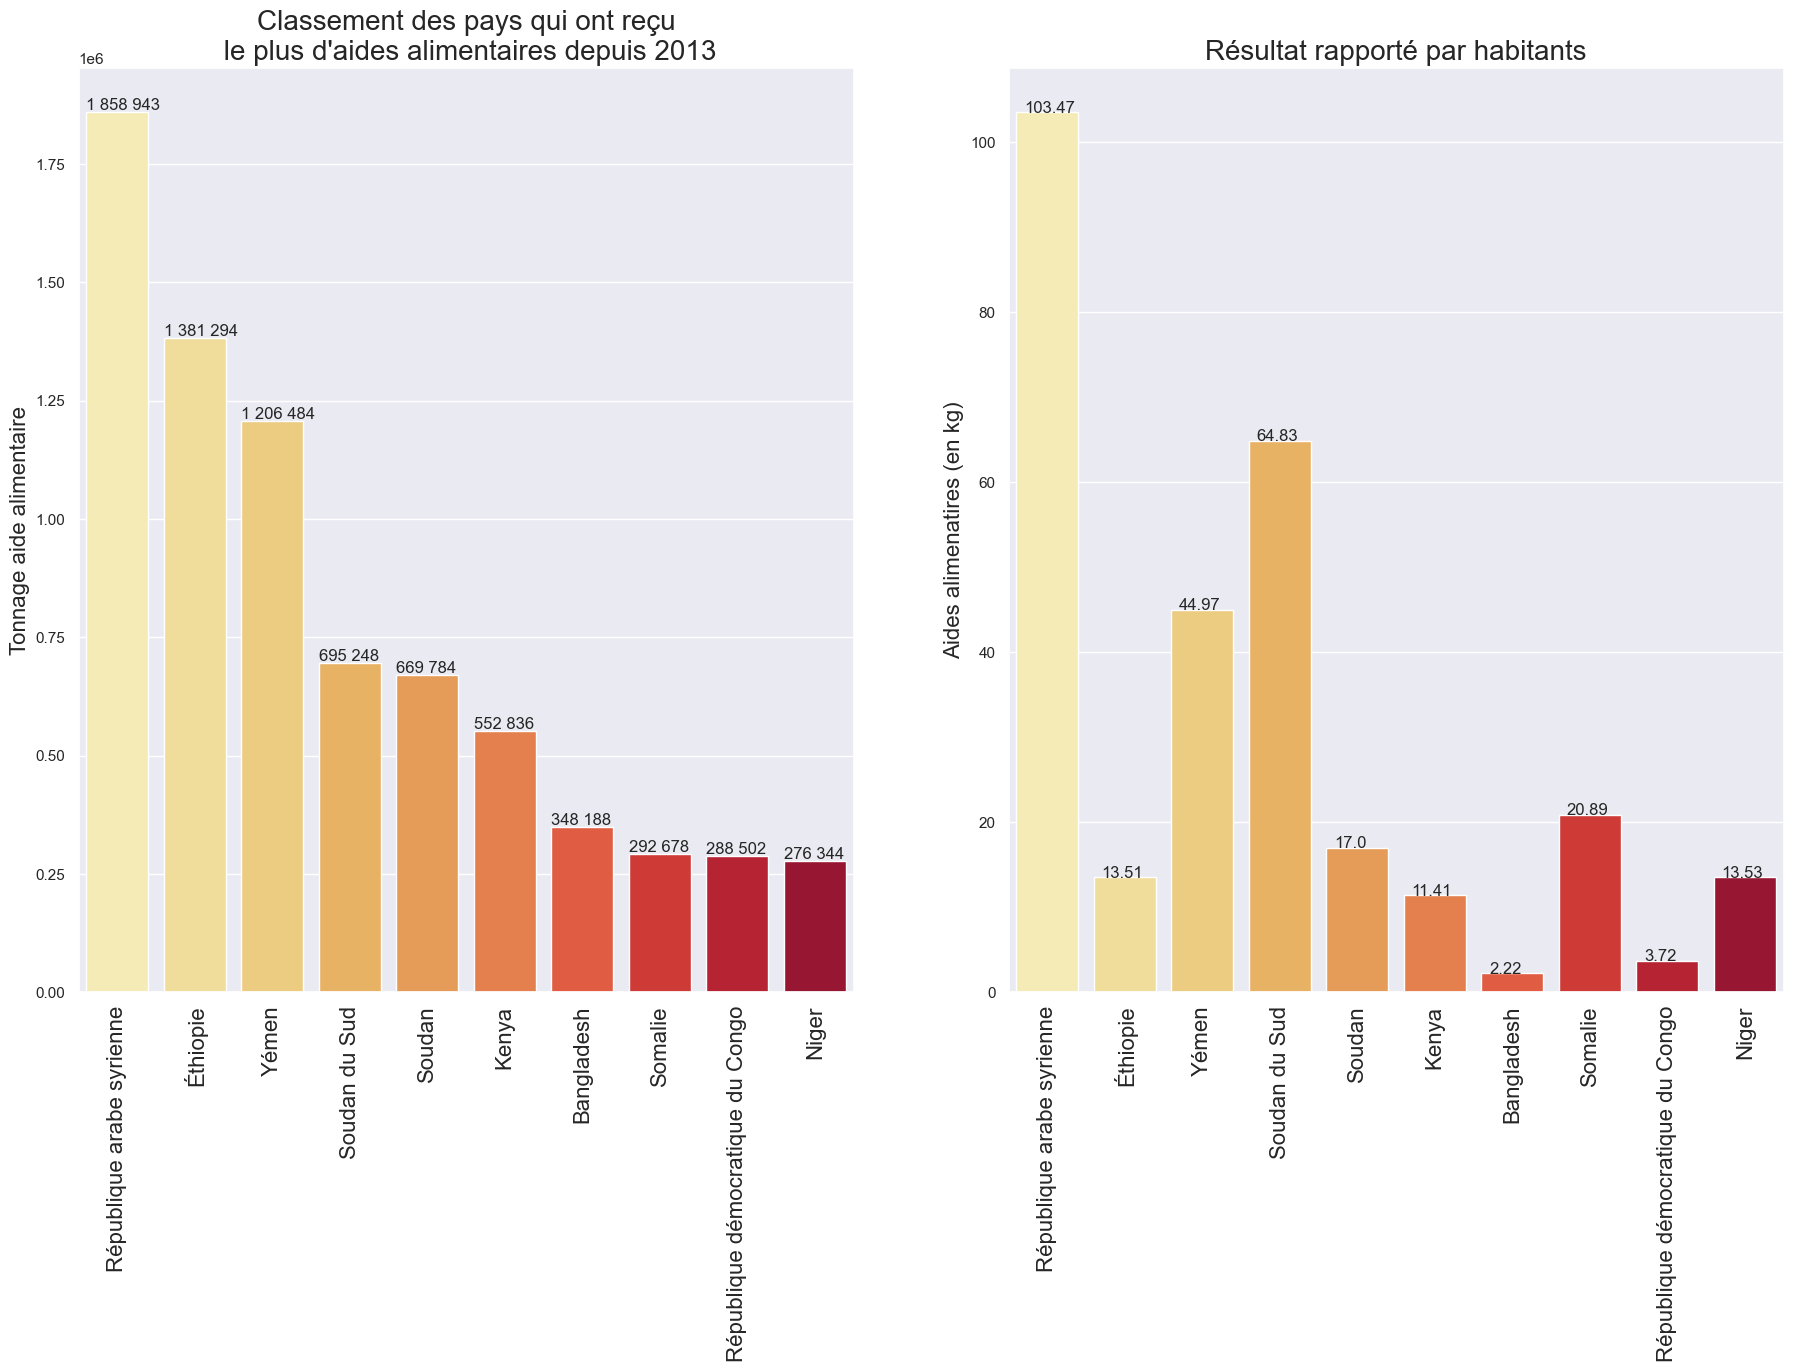

In [95]:
n=10
df_pays_aide_alimentaire_population_moyenne_desc_vis2=data.head(n)


plt.figure(figsize=(22,12))

plt.subplot(1,2,1)

sns.barplot(data=df_pays_aide_alimentaire_population_moyenne_desc_vis2, x='Pays',
            y='Tonnage aide alimentaire', orient='v', palette='YlOrRd')

plt.title("Classement des pays qui ont reçu\n le plus d'aides alimentaires depuis 2013", fontsize=20)
plt.ylabel('Tonnage aide alimentaire', fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=90, fontsize=16)

for i in range(len(df_pays_aide_alimentaire_population_moyenne_desc_vis2['Pays'])):
    plt.text(i-0.4,df_pays_aide_alimentaire_population_moyenne_desc_vis2.iloc[i,1]+0.5e4 ,
             '{:,}'.format(df_pays_aide_alimentaire_population_moyenne_desc_vis2.iloc[i,1]).replace(',',' '))
    
    
plt.subplot(1,2,2)


sns.barplot(data=df_pays_aide_alimentaire_population_moyenne_desc_vis2, x='Pays',
            y='Aide alimentaire/habitant (en kg)', orient='v', palette='YlOrRd')

plt.title("Résultat rapporté par habitants", fontsize=20)
plt.ylabel('Aides alimenatires (en kg)', fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=90, fontsize=16)

for i in range(len(df_pays_aide_alimentaire_population_moyenne_desc_vis2['Pays'])):
    plt.text(i-0.3, df_pays_aide_alimentaire_population_moyenne_desc_vis2.iloc[i,3],
             df_pays_aide_alimentaire_population_moyenne_desc_vis2.iloc[i,3])


plt.show()

A l'inverse, ce graphique met en avant, les pays ayant une population importante qui semblent avoir reçu beaucoup d'aides mais qui rapporté au nombre d'habitants, n'en n'ont pas forcément eu énormémément. Comme le Bangladesh, la République démocratique du Congo et dans une moindre mesure le Kenya.

In [96]:
for pays, aide in zip(df_pays_aide_alimentaire_population_moyenne_desc['Pays'].head(10),
                      df_pays_aide_alimentaire_population_moyenne_desc['Aide alimentaire/habitant (en kg)'].head(10)):
    print('-',pays,':',aide,"kg/habitant")

- République arabe syrienne : 103.47 kg/habitant
- Soudan du Sud : 64.83 kg/habitant
- Yémen : 44.97 kg/habitant
- Djibouti : 44.82 kg/habitant
- Palestine : 36.97 kg/habitant
- Somalie : 20.89 kg/habitant
- Tchad : 18.68 kg/habitant
- Nicaragua : 18.41 kg/habitant
- Soudan : 17.0 kg/habitant
- République centrafricaine : 14.69 kg/habitant


In [97]:
df_pays_aide_alimentaire.head(10)

,Pays,Tonnage aide alimentaire
0,République arabe syrienne,1858943
1,Éthiopie,1381294
2,Yémen,1206484
3,Soudan du Sud,695248
4,Soudan,669784
5,Kenya,552836
6,Bangladesh,348188
7,Somalie,292678
8,République démocratique du Congo,288502
9,Niger,276344


<a id='conclusion_question_8'></a>
## Conclusion Question 8<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

Voici les pays dont les aides alimentaires sont les plus importantes depuis 2013 :
- République arabe syrienne : 1858943 tonnes
- Éthiopie : 1381294 tonnes
- Yémen : 1206484 tonnes
- Soudan du Sud : 695248 tonnes
- Soudan : 669784 tonnes
- Kenya : 552836 tonnes
- Bangladesh : 348188 tonnes
- Somalie : 292678 tonnes
- République démocratique du Congo : 288502 tonnes
- Niger : 276344 tonnes

Cependant, ce résultat est à nuancer, en prenant en compte la population, on voit qu'une partie de la liste change :
- République arabe syrienne : 103.47 kg/habitant
- Soudan du Sud : 64.83 kg/habitant
- Yémen : 44.97 kg/habitant
- Djibouti : 44.82 kg/habitant
- Palestine : 36.97 kg/habitant
- Somalie : 20.89 kg/habitant
- Tchad : 18.68 kg/habitant
- Nicaragua : 18.41 kg/habitant
- Soudan : 17.0 kg/habitant
- République centrafricaine : 14.69 kg/habitant


Ce résultat peut être encore approfondie en discrétisant les variables d'aides alimentaires et en déterminant par exemple ce qui est "beaucoup"/"pas beaucoup" d'aides alimentaires par habitants, en indiquant une catégorie par interval de chiffres.

On pourrait également regarder les disponibilités alimentaires de ces pays ainsi que leur proportion de personnes en état de sous nutrition (bien que beaucoup de données sont manquantes, y compris pour les pays concernés par les aides alimentaires).

<a href="#fin_question_8" style="font-size : 10px ; padding-left:10px">Données approfondissement</a>

### Tableau qui compare les variables extrait du DF de la partie approfondissement
J'ai fait une moyenne par an pour les aides alimentaires

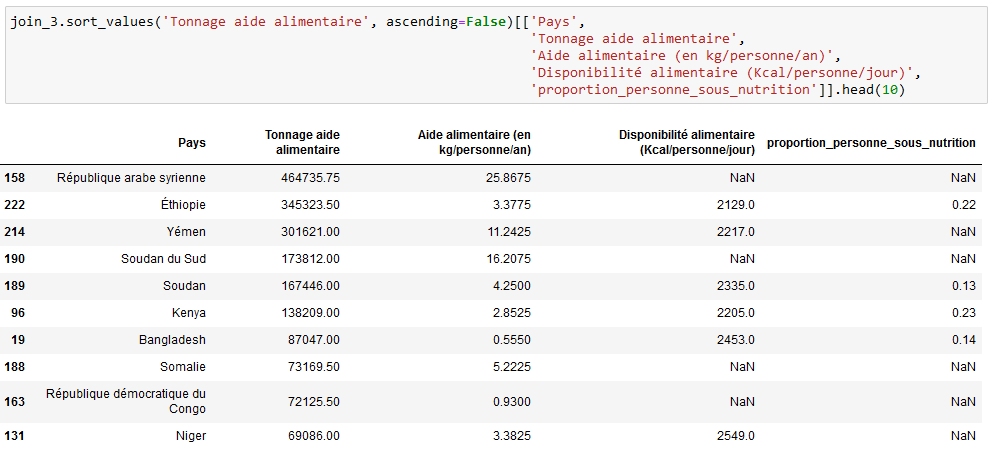

<a id='question_9'></a>
## Question 9 : Quels sont les pays qui ont le plus de disponibilités alimentaires ? <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

In [98]:
df_dispo_alimentaire_pays=df_dispo_alimentaire.groupby('Pays')[['Disponibilité alimentaire (Kcal/personne/jour)']].sum().reset_index()
df_dispo_alimentaire_pays

,Pays,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0
...,...,...
169,Émirats arabes unis,3275.0
170,Équateur,2346.0
171,États-Unis d'Amérique,3682.0
172,Éthiopie,2129.0


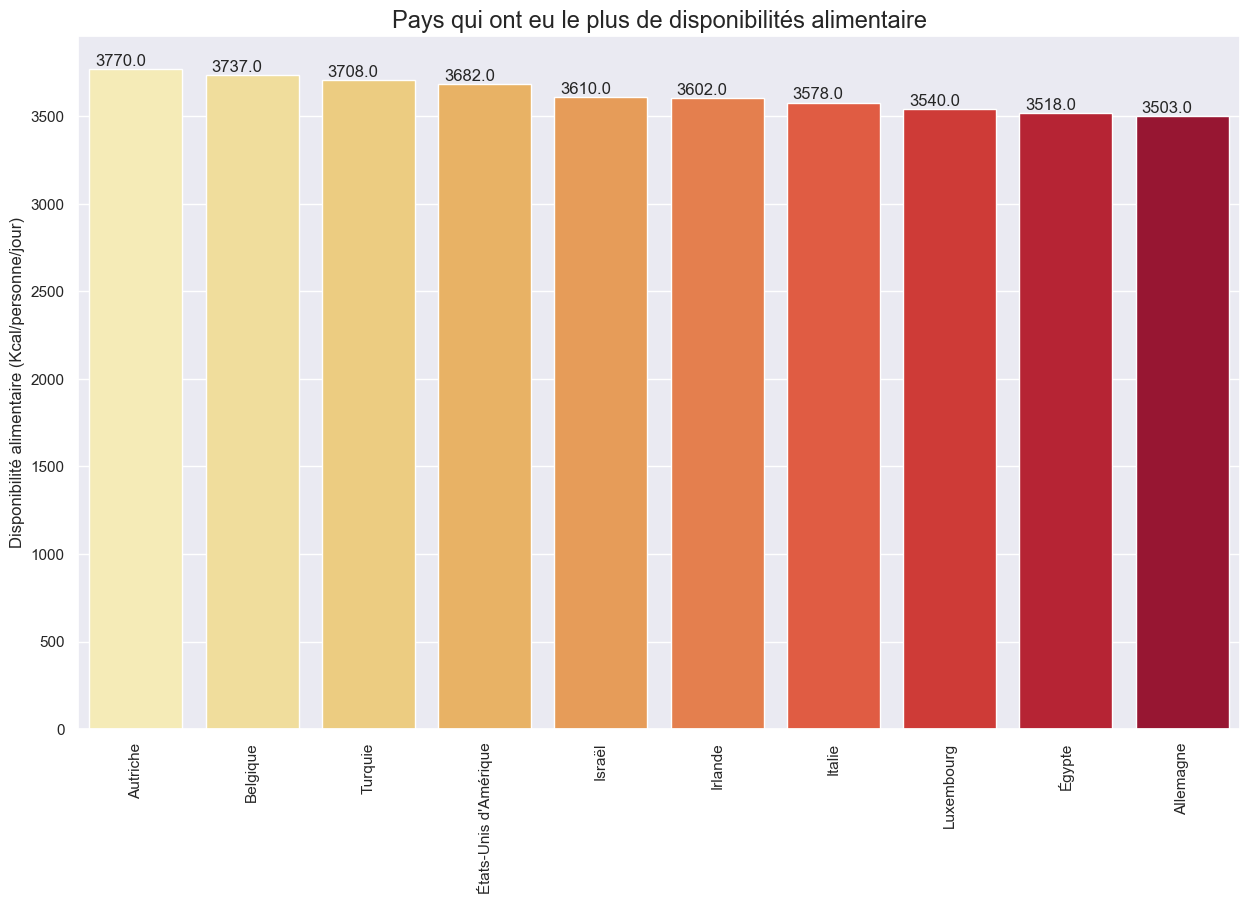

In [99]:
data_vis=df_dispo_alimentaire_pays.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)

plt.figure(figsize=(15,9))

sns.barplot(data=data_vis, x='Pays', y='Disponibilité alimentaire (Kcal/personne/jour)', palette='YlOrRd')

plt.title("Pays qui ont eu le plus de disponibilités alimentaire", fontsize=17)
plt.xlabel(None)
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.xticks(rotation=90)

for i in range(len(data_vis['Pays'])):
    plt.text(i-0.35, data_vis.iloc[i,1]+20, data_vis.iloc[i,1])


plt.show()

In [100]:
for pays, dispo in zip(data_vis['Pays'].head(10), data_vis['Disponibilité alimentaire (Kcal/personne/jour)'].head(10)):
    print('-',pays,':',dispo,'kcal/personne/jour')

- Autriche : 3770.0 kcal/personne/jour
- Belgique : 3737.0 kcal/personne/jour
- Turquie : 3708.0 kcal/personne/jour
- États-Unis d'Amérique : 3682.0 kcal/personne/jour
- Israël : 3610.0 kcal/personne/jour
- Irlande : 3602.0 kcal/personne/jour
- Italie : 3578.0 kcal/personne/jour
- Luxembourg : 3540.0 kcal/personne/jour
- Égypte : 3518.0 kcal/personne/jour
- Allemagne : 3503.0 kcal/personne/jour


<a id='reponse_question_9' ></a>
## Réponse Question 9<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

Voici les pays qui ont la disponibilité alimentaire la plus importante :
- Autriche : 3770.0 kcal/personne/jour
- Belgique : 3737.0 kcal/personne/jour
- Turquie : 3708.0 kcal/personne/jour
- États-Unis d'Amérique : 3682.0 kcal/personne/jour
- Israël : 3610.0 kcal/personne/jour
- Irlande : 3602.0 kcal/personne/jour
- Italie : 3578.0 kcal/personne/jour
- Luxembourg : 3540.0 kcal/personne/jour
- Égypte : 3518.0 kcal/personne/jour
- Allemagne : 3503.0 kcal/personne/jour

Est ce que certains de ces pays sont concernés par les aides alimentaires ou la sous nutrition ?

L'Egypte atteint la 9e position, cependant, les données de sous nutrition indique que 5% de la population est en état de sous nutrition. On peut donc en déduire des inégalités. On voit aussi que ce pays a reçu des aides alimentaires, mais en très faible quantité.

<a href="#fin_question_9" style="font-size : 10px ; padding-left:10px">Données approfondissement</a>

<a id='question_10'></a>
## Question 10 : Quels sont les pays qui ont le moins de disponibilités alimentaires ? <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

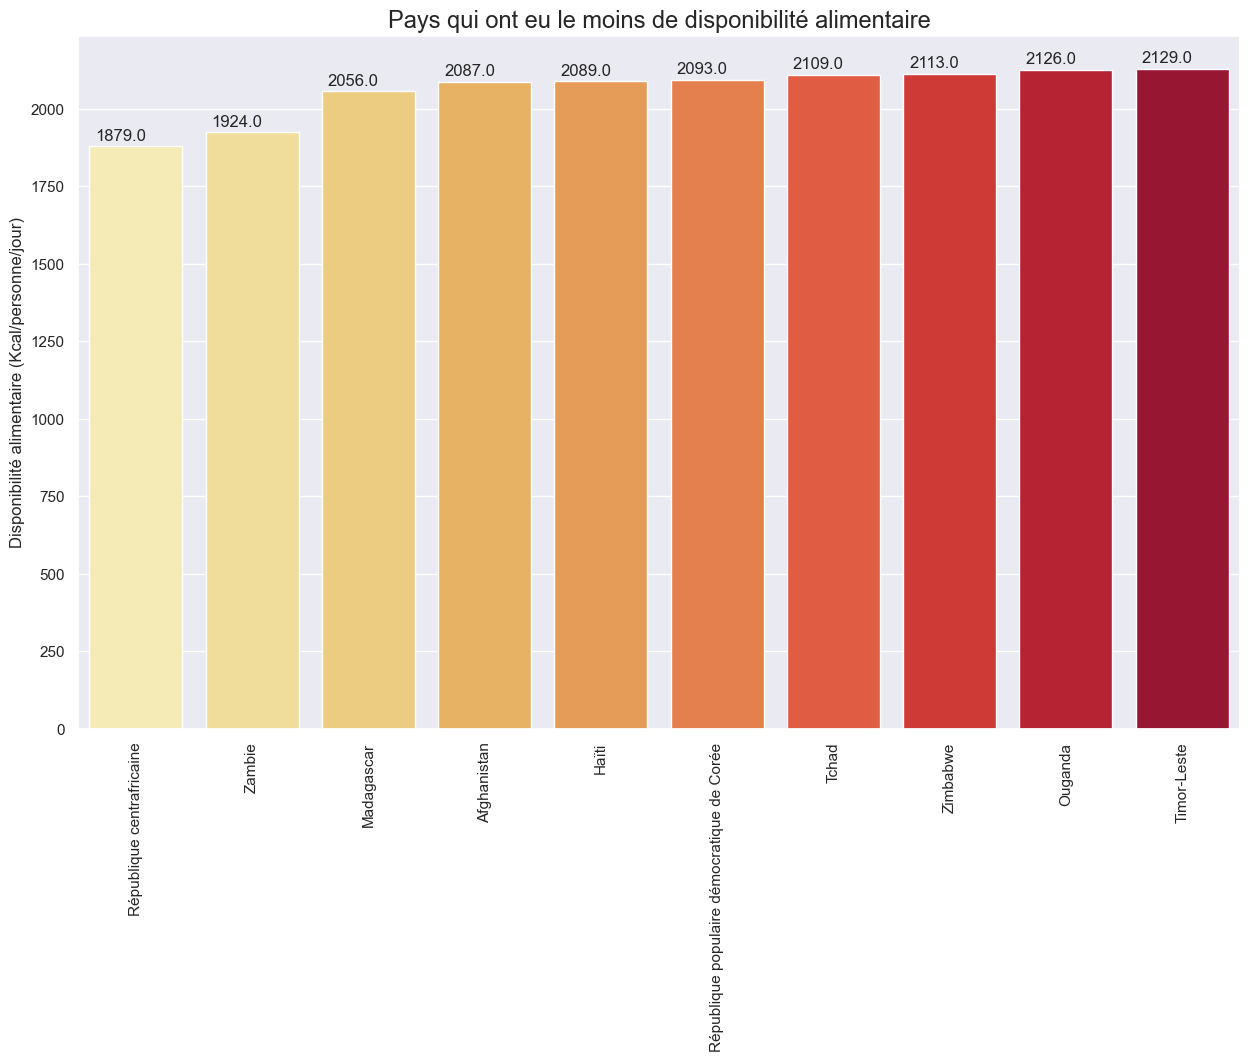

In [101]:
data_vis=df_dispo_alimentaire_pays.sort_values('Disponibilité alimentaire (Kcal/personne/jour)').head(10)

plt.figure(figsize=(15,9))

sns.barplot(data=data_vis, x='Pays', y='Disponibilité alimentaire (Kcal/personne/jour)', palette='YlOrRd')

plt.title("Pays qui ont eu le moins de disponibilité alimentaire", fontsize=17)
plt.xlabel(None)
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.xticks(rotation=90)

for i in range(len(data_vis['Pays'])):
    plt.text(i-0.35, data_vis.iloc[i,1]+20, data_vis.iloc[i,1])


plt.show()

In [102]:
for pays, dispo in zip(data_vis['Pays'].head(10), data_vis['Disponibilité alimentaire (Kcal/personne/jour)'].head(10)):
    print('-',pays,':',dispo,'kcal/personne/jour')

- République centrafricaine : 1879.0 kcal/personne/jour
- Zambie : 1924.0 kcal/personne/jour
- Madagascar : 2056.0 kcal/personne/jour
- Afghanistan : 2087.0 kcal/personne/jour
- Haïti : 2089.0 kcal/personne/jour
- République populaire démocratique de Corée : 2093.0 kcal/personne/jour
- Tchad : 2109.0 kcal/personne/jour
- Zimbabwe : 2113.0 kcal/personne/jour
- Ouganda : 2126.0 kcal/personne/jour
- Timor-Leste : 2129.0 kcal/personne/jour


<a id='reponse_question_10' ></a>
## Réponse Question 10<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

Voici les pays qui ont la disponibilité alimentaire la plus faible :
- République centrafricaine : 1879.0 kcal/personne/jour
- Zambie : 1924.0 kcal/personne/jour
- Madagascar : 2056.0 kcal/personne/jour
- Afghanistan : 2087.0 kcal/personne/jour
- Haïti : 2089.0 kcal/personne/jour
- République populaire démocratique de Corée : 2093.0 kcal/personne/jour
- Tchad : 2109.0 kcal/personne/jour
- Zimbabwe : 2113.0 kcal/personne/jour
- Ouganda : 2126.0 kcal/personne/jour
- Timor-Leste : 2129.0 kcal/personne/jour


Dans quelles mesures ces pays sont concernés par les aides alimentaires et la sous nutrition ?
Quelles sont leurs exportations de ressources alimentaires ?

D'après les données ci-dessous, ces pays reçoivent des aides alimentaire mais ne figurent pas parmis les pays qui en reçoivent le plus. On a par exemple la République centrafricaine et le Tchad qui figurent dans les 10 premiers pays ayant eu le plus d'aides alimentaires par habitant mais on a aussi la Zambie ou l'Ouganda qui n'ont pratiquement reçu aucune aide alimentaire (66e et 51e du classement).

Concernant la proportion de personnes en état de sous nutrition, voici les données :
- République centrafricaine : non communiqué
- Zambie : non communiqué
- Madagascar : 39%
- Afghanistan : 28%
- Haïti : 48%
- République populaire démocratique de Corée : 45%
- Tchad : 37%
- Zimbabwe : non communiqué
- Ouganda : non communiqué
- Éthiopie : 22%

Tous ces pays ont une énorme proportion de leurs habitants en sous nutrition ou les données sont absentes. Ce phénomène est fréquent notamment pour les pays les plus pauvres, par exemple, plusieurs pays ayant reçu beaucoup d'aides alimentaires n'ont pas de données sur leur population en sous nutrition et parfois sur leur disponiblité alimentaire.

<a href="#fin_question_10" style="font-size : 10px ; padding-left:10px">Données approfondissement</a>

### Tableau qui compare les variables extrait du DF de la partie approfondissement
J'ai fait une moyenne par an pour les aides alimentaires

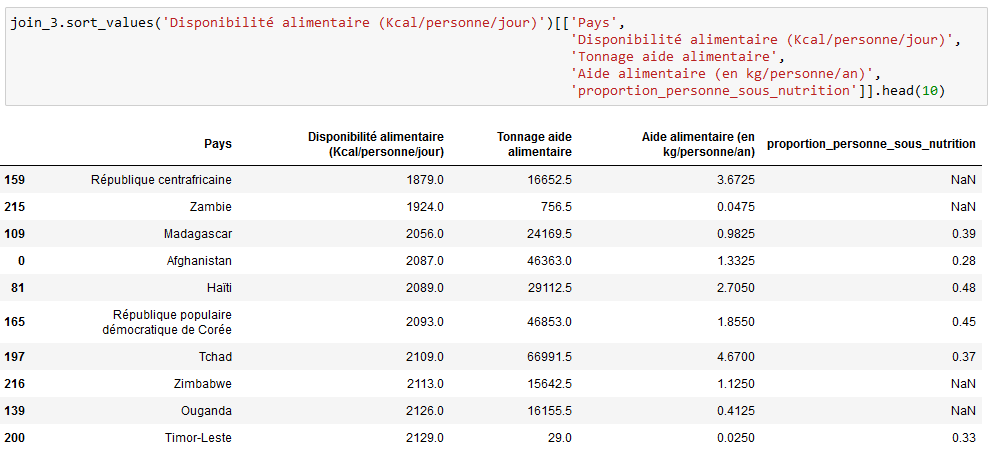

<a id='approfondissement'></a>
## Approfondissement<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

La partie qui suit donne le détail des calculs et de la programmation des chiffres qui m'ont permis d'enrichir mes réponses ci-dessus.

J'y est réalisé un tableau global avec des variables de chacun des fichiers, il y a également des champs calculés et des requêtes associées à certaines des questions précédentes.

J'ai aussi étudié la corrélation de plusieurs variables via des nuages de points.

## Jointure depuis dispo alimentaire

### Fichier population

In [103]:
data_1=df_population.groupby('Pays')[['Population']].mean().astype('int64').reset_index()
data_1.head()

,Pays,Population
0,Afghanistan,34817508
1,Afrique du Sud,55771265
2,Albanie,2890659
3,Algérie,40160139
4,Allemagne,82064791


### Fichier dispo alimentaire

In [104]:
data_2=df_dispo_alimentaire.groupby('Pays')[['Disponibilité alimentaire (Kcal/personne/jour)','Importations - Quantité','Exportations - Quantité', 'Production']].sum().reset_index()
data_2.head()

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Importations - Quantité,Exportations - Quantité,Production
0,Afghanistan,2087.0,2988000.0,278000.0,11171000.0
1,Afrique du Sud,3020.0,7517000.0,11674000.0,63263000.0
2,Albanie,3188.0,933000.0,94000.0,3964000.0
3,Algérie,3293.0,17403000.0,655000.0,26359000.0
4,Allemagne,3503.0,65353000.0,57431000.0,154547000.0


In [105]:
join_1=pd.merge(data_1, data_2, on='Pays', how='left')
join_1.head()

,Pays,Population,Disponibilité alimentaire (Kcal/personne/jour),Importations - Quantité,Exportations - Quantité,Production
0,Afghanistan,34817508,2087.0,2988000.0,278000.0,11171000.0
1,Afrique du Sud,55771265,3020.0,7517000.0,11674000.0,63263000.0
2,Albanie,2890659,3188.0,933000.0,94000.0,3964000.0
3,Algérie,40160139,3293.0,17403000.0,655000.0,26359000.0
4,Allemagne,82064791,3503.0,65353000.0,57431000.0,154547000.0


### Fichier aide alimentaire

In [106]:
data_3=df_pays_aide_alimentaire_population_moyenne_desc.sort_values('Pays')[['Pays', 'Tonnage aide alimentaire',
                                                                             'Aide alimentaire/habitant (en kg)']].reset_index(drop=True)
# on fait la moyenne des 4 années pour chaque pays pour les aides alimentaires
data_3['Tonnage aide alimentaire']=data_3['Tonnage aide alimentaire']/4
data_3['Aide alimentaire/habitant (en kg)']=data_3['Aide alimentaire/habitant (en kg)']/4
data_3.rename(columns={'Aide alimentaire/habitant (en kg)':'Aide alimentaire (en kg/personne/an)'}, inplace=True)
data_3.head()

,Pays,Tonnage aide alimentaire,Aide alimentaire (en kg/personne/an)
0,Afghanistan,46363.0,1.3325
1,Algérie,20278.5,0.5050
2,Angola,1253.5,0.0450
3,Bangladesh,87047.0,0.5550
4,Bhoutan,666.5,0.9100


In [107]:
join_2=pd.merge(join_1, data_3, on='Pays', how='left')
join_2.head()

,Pays,Population,Disponibilité alimentaire (Kcal/personne/jour),Importations - Quantité,Exportations - Quantité,Production,Tonnage aide alimentaire,Aide alimentaire (en kg/personne/an)
0,Afghanistan,34817508,2087.0,2988000.0,278000.0,11171000.0,46363.0,1.3325
1,Afrique du Sud,55771265,3020.0,7517000.0,11674000.0,63263000.0,NaN,NaN
2,Albanie,2890659,3188.0,933000.0,94000.0,3964000.0,NaN,NaN
3,Algérie,40160139,3293.0,17403000.0,655000.0,26359000.0,20278.5,0.5050
4,Allemagne,82064791,3503.0,65353000.0,57431000.0,154547000.0,NaN,NaN


### Fichier sous nutrition

In [108]:
df_sous_nutrition_population_moyenne=df_sous_nutrition.groupby('Pays')[['Population_en_sous_nutrition']].mean().astype('int64').reset_index()

In [109]:
data_4=df_sous_nutrition_population_moyenne.loc[df_sous_nutrition_population_moyenne['Population_en_sous_nutrition']!=0,:].reset_index(drop=True)
data_4.head()

,Pays,Population_en_sous_nutrition
0,Afghanistan,9600000
1,Afrique du Sud,2816666
2,Albanie,100000
3,Algérie,1283333
4,Angola,6033333


In [110]:
join_3=pd.merge(join_2, data_4, on='Pays', how='left')
join_3.head()

,Pays,Population,Disponibilité alimentaire (Kcal/personne/jour),Importations - Quantité,Exportations - Quantité,Production,Tonnage aide alimentaire,Aide alimentaire (en kg/personne/an),Population_en_sous_nutrition
0,Afghanistan,34817508,2087.0,2988000.0,278000.0,11171000.0,46363.0,1.3325,9600000.0
1,Afrique du Sud,55771265,3020.0,7517000.0,11674000.0,63263000.0,NaN,NaN,2816666.0
2,Albanie,2890659,3188.0,933000.0,94000.0,3964000.0,NaN,NaN,100000.0
3,Algérie,40160139,3293.0,17403000.0,655000.0,26359000.0,20278.5,0.5050,1283333.0
4,Allemagne,82064791,3503.0,65353000.0,57431000.0,154547000.0,NaN,NaN,NaN


## Création de champs calculés

In [111]:
join_3['proportion_personne_sous_nutrition']=round(join_3['Population_en_sous_nutrition']/join_3['Population'],2)

In [112]:
join_3['proportion_production_exportee']=join_3['Exportations - Quantité']/join_3['Production']

In [113]:
join_3.head(30)

,Pays,Population,Disponibilité alimentaire (Kcal/personne/jour),Importations - Quantité,Exportations - Quantité,Production,Tonnage aide alimentaire,Aide alimentaire (en kg/personne/an),Population_en_sous_nutrition,proportion_personne_sous_nutrition,proportion_production_exportee
0,Afghanistan,34817508,2087.0,2988000.0,278000.0,11171000.0,46363.0,1.3325,9600000.0,0.28,0.024886
1,Afrique du Sud,55771265,3020.0,7517000.0,11674000.0,63263000.0,NaN,NaN,2816666.0,0.05,0.184531
2,Albanie,2890659,3188.0,933000.0,94000.0,3964000.0,NaN,NaN,100000.0,0.03,0.023713
3,Algérie,40160139,3293.0,17403000.0,655000.0,26359000.0,20278.5,0.5050,1283333.0,0.03,0.024849
4,Allemagne,82064791,3503.0,65353000.0,57431000.0,154547000.0,NaN,NaN,NaN,NaN,0.371609
5,Andorre,78217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Angola,28385163,2474.0,4416000.0,23000.0,28857000.0,1253.5,0.0450,6033333.0,0.21,0.000797
7,Anguilla,14348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Antigua-et-Barbuda,93980,2416.0,63000.0,0.0,20000.0,NaN,NaN,NaN,NaN,0.000000
9,Antilles néerlandaises (ex),271029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
join_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Pays                                            236 non-null    object 
 1   Population                                      236 non-null    int64  
 2   Disponibilité alimentaire (Kcal/personne/jour)  174 non-null    float64
 3   Importations - Quantité                         174 non-null    float64
 4   Exportations - Quantité                         174 non-null    float64
 5   Production                                      174 non-null    float64
 6   Tonnage aide alimentaire                        76 non-null     float64
 7   Aide alimentaire (en kg/personne/an)            76 non-null     float64
 8   Population_en_sous_nutrition                    87 non-null     float64
 9   proportion_personne_sous_nutrition         

Infos :

Les données de dispo alimentaire (Disponibilité alimentaire, Exportations, Importations) sont pour l'année 2017

Les données de population et population en sous nutrition sont une moyenne de 6 année (2013 à 2018)

Les données d'aide alimentaire (tonnage aide et aide/habitant) une moyenne de 4 années (2013 à 2016)

<a id='fin_question_8'></a>
### Element de réponse question fin question 8<a href="#conclusion_question_8" style="font-size : 10px ; padding-left:10px">Réponse Question 8</a>

In [115]:
join_3.sort_values('Tonnage aide alimentaire', ascending=False)[['Pays',
                                                                 'Tonnage aide alimentaire',
                                                                 'Aide alimentaire (en kg/personne/an)',
                                                                 'Disponibilité alimentaire (Kcal/personne/jour)',
                                                                 'proportion_personne_sous_nutrition']].head(10)

,Pays,Tonnage aide alimentaire,Aide alimentaire (en kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),proportion_personne_sous_nutrition
158,République arabe syrienne,464735.75,25.8675,NaN,NaN
222,Éthiopie,345323.50,3.3775,2129.0,0.22
214,Yémen,301621.00,11.2425,2217.0,NaN
190,Soudan du Sud,173812.00,16.2075,NaN,NaN
189,Soudan,167446.00,4.2500,2335.0,0.13
96,Kenya,138209.00,2.8525,2205.0,0.23
19,Bangladesh,87047.00,0.5550,2453.0,0.14
188,Somalie,73169.50,5.2225,NaN,NaN
163,République démocratique du Congo,72125.50,0.9300,NaN,NaN
131,Niger,69086.00,3.3825,2549.0,NaN


<a id='fin_question_9'></a>
### Element de réponse question fin question 9<a href="#reponse_question_9" style="font-size : 10px ; padding-left:10px">Réponse Question 9</a>

In [116]:
join_3.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', 
                   ascending=False)[['Pays', 'Population','Disponibilité alimentaire (Kcal/personne/jour)',
                                     'proportion_production_exportee', 'Aide alimentaire (en kg/personne/an)',
                                     'proportion_personne_sous_nutrition']].head(10)

,Pays,Population,Disponibilité alimentaire (Kcal/personne/jour),proportion_production_exportee,Aide alimentaire (en kg/personne/an),proportion_personne_sous_nutrition
15,Autriche,8718108,3770.0,0.371394,NaN,NaN
21,Belgique,11319920,3737.0,1.238774,NaN,NaN
207,Turquie,79161422,3708.0,0.106183,NaN,NaN
221,États-Unis d'Amérique,321858212,3682.0,0.182776,NaN,NaN
90,Israël,8050315,3610.0,0.238633,NaN,NaN
88,Irlande,4693739,3602.0,0.593688,NaN,NaN
91,Italie,60519832,3578.0,0.292412,NaN,NaN
107,Luxembourg,573206,3540.0,1.384486,NaN,NaN
217,Égypte,93430851,3518.0,0.052312,0.0025,0.05
4,Allemagne,82064791,3503.0,0.371609,NaN,NaN


<a id='fin_question_10'></a>
### Element de réponse question fin question 10<a href="#reponse_question_10" style="font-size : 10px ; padding-left:10px">Réponse Question 10</a>

In [117]:
join_3.sort_values('Disponibilité alimentaire (Kcal/personne/jour)')[['Pays',
                                                                      'Population',
                                                                      'Disponibilité alimentaire (Kcal/personne/jour)',
                                                                      'proportion_production_exportee',
                                                                      'Tonnage aide alimentaire',
                                                                      'Aide alimentaire (en kg/personne/an)',
                                                                      'proportion_personne_sous_nutrition']].head(10)

,Pays,Population,Disponibilité alimentaire (Kcal/personne/jour),proportion_production_exportee,Tonnage aide alimentaire,Aide alimentaire (en kg/personne/an),proportion_personne_sous_nutrition
159,République centrafricaine,4534227,1879.0,0.000000,16652.5,3.6725,NaN
215,Zambie,16129076,1924.0,0.064127,756.5,0.0475,NaN
109,Madagascar,24585404,2056.0,0.016667,24169.5,0.9825,0.39
0,Afghanistan,34817508,2087.0,0.024886,46363.0,1.3325,0.28
81,Haïti,10765123,2089.0,0.002957,29112.5,2.7050,0.48
165,République populaire démocratique de Corée,25243035,2093.0,0.005979,46853.0,1.8550,0.45
197,Tchad,14341852,2109.0,0.000000,66991.5,4.6700,0.37
216,Zimbabwe,13909572,2113.0,0.035128,15642.5,1.1250,NaN
139,Ouganda,39062714,2126.0,0.046275,16155.5,0.4125,NaN
200,Timor-Leste,1209074,2129.0,0.061995,29.0,0.0250,0.33


In [118]:
join_3.head()

,Pays,Population,Disponibilité alimentaire (Kcal/personne/jour),Importations - Quantité,Exportations - Quantité,Production,Tonnage aide alimentaire,Aide alimentaire (en kg/personne/an),Population_en_sous_nutrition,proportion_personne_sous_nutrition,proportion_production_exportee
0,Afghanistan,34817508,2087.0,2988000.0,278000.0,11171000.0,46363.0,1.3325,9600000.0,0.28,0.024886
1,Afrique du Sud,55771265,3020.0,7517000.0,11674000.0,63263000.0,NaN,NaN,2816666.0,0.05,0.184531
2,Albanie,2890659,3188.0,933000.0,94000.0,3964000.0,NaN,NaN,100000.0,0.03,0.023713
3,Algérie,40160139,3293.0,17403000.0,655000.0,26359000.0,20278.5,0.5050,1283333.0,0.03,0.024849
4,Allemagne,82064791,3503.0,65353000.0,57431000.0,154547000.0,NaN,NaN,NaN,NaN,0.371609


## Mesure de corrélation entre plusieurs variables
#### Chaque point représente un pays

Text(0, 0.5, 'Proportion de la population en sous nutrition (%)')

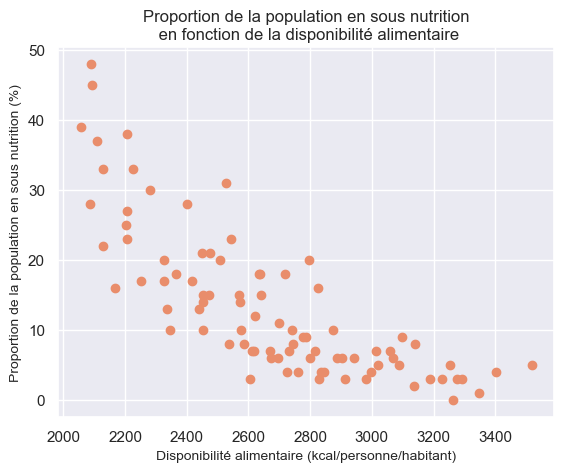

In [119]:
plt.scatter(x=join_3['Disponibilité alimentaire (Kcal/personne/jour)'], y=join_3['proportion_personne_sous_nutrition']*100)
plt.title('Proportion de la population en sous nutrition\n en fonction de la disponibilité alimentaire')
plt.xlabel('Disponibilité alimentaire (kcal/personne/habitant)', fontsize=10)
plt.ylabel('Proportion de la population en sous nutrition (%)', fontsize=10)

On peut voir une corrélation inverse entre les deux variables.

Globalement, pour les pays, plus la disponibilité alimentaire est faible, plus la proportion de personne en sous nutrition est élevée.

Text(0, 0.5, 'Aides alimentaires par habitant (kg/personne/an)')

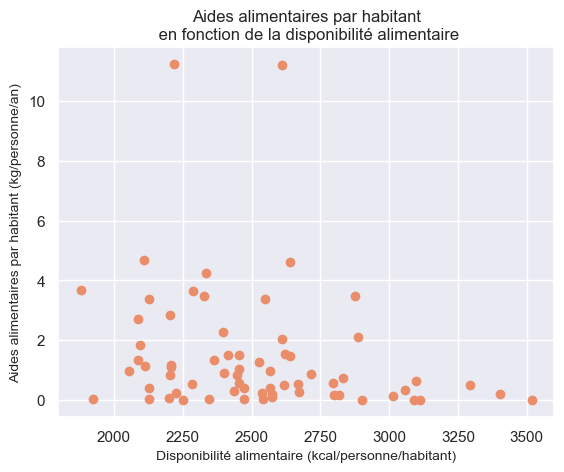

In [120]:
plt.scatter(x=join_3['Disponibilité alimentaire (Kcal/personne/jour)'], y=join_3['Aide alimentaire (en kg/personne/an)'])
plt.title('Aides alimentaires par habitant\n en fonction de la disponibilité alimentaire')
plt.xlabel('Disponibilité alimentaire (kcal/personne/habitant)', fontsize=10)
plt.ylabel('Aides alimentaires par habitant (kg/personne/an)', fontsize=10)

Pas de corrélation visible ici, on ne peut pas dire que la quantité d'aides alimentaires dépend de la disponibilité alimentaire. Il y a donc d'autres facteurs qui rentrent en compte.

On rappelle également qu'il y a des données manquantes pour certaines variables et que le résultat peut être en partie biaisé.

Text(0, 0.5, 'Aides alimentaires par habitant (kg/personne/an)')

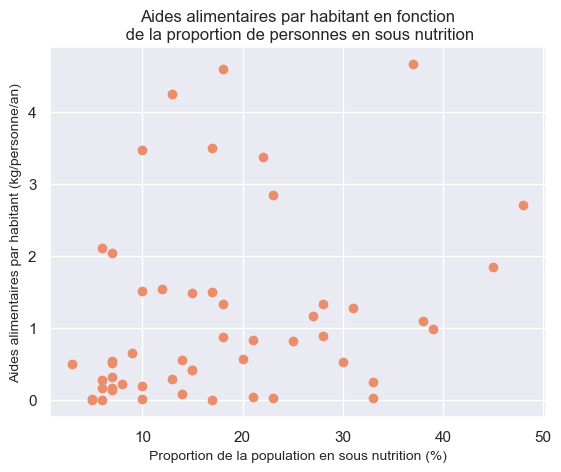

In [121]:
plt.scatter(x=join_3['proportion_personne_sous_nutrition']*100, y=join_3['Aide alimentaire (en kg/personne/an)'])
plt.title('Aides alimentaires par habitant en fonction\n de la proportion de personnes en sous nutrition')
plt.xlabel('Proportion de la population en sous nutrition (%)', fontsize=10)
plt.ylabel('Aides alimentaires par habitant (kg/personne/an)', fontsize=10)

Par de corrélation visible ici non plus, on ne peut pas dire que la quantité d'aides alimentaires dépend de la proportion de personnes en sous nutrition. Comme précédemment, on peut dire que d'autres facteurs rentrent en compte.